In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplolib inline
import missingno
import upsetplot
pd.options.display.max_columns = None

In [37]:
# importando funciones personalizadas
%run pandas-missing-extension.ipynb

# Leyendo los datos

In [24]:
df = pd.read_csv("../data/base_prueba.csv")
print(df.shape)
df.head()


(11162, 32)


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit,tenencia_ahorros,tenencia_corriente,tenencia_cdt,tenencia_tdc,tenencia_lb,tenencia_vehiculo,ingresos,egresos,saldo_captacion,saldo_tdc,monto_trx_tdc,cantidad_trx_tdc,saldo_lb,saldo_veh,monto_trx_debito,cantidad_trx_debito
0,255,26,admin.,married,secondary,0,808.730361,1,1,unknown,1306.782842,2,-1,0,unknown,1,1.0,1.0,1.0,1.0,1.0,1.0,3280.360862,3051.831513,12661.246820,6965.430755,1108.591174,21.683800,42981.114440,105481.670183,6248.690727,24.886023
1,577,27,technician,single,NaN,0,NaN,1,1,cellular,759.070617,2,-1,0,unknown,1,1.0,0.0,1.0,NaN,1.0,1.0,3204.246501,2893.332815,7722.476945,7924.012406,3263.588791,7.335863,13501.630990,42870.820418,NaN,17.136963
2,975,30,services,single,primary,0,34.154847,1,1,cellular,725.536216,1,-1,0,unknown,1,0.0,1.0,0.0,1.0,1.0,1.0,-1413.998367,121.506093,14410.896006,9145.492908,1055.635215,2.879881,38742.228206,45211.190937,1943.656495,22.864764
3,1351,47,blue-collar,NaN,NaN,0,255.810941,1,1,cellular,3097.251479,1,-1,0,unknown,1,NaN,0.0,1.0,1.0,1.0,1.0,4761.027897,3857.669532,NaN,9713.523952,NaN,46.292876,43523.860809,29956.878580,854.062756,-5.636709
4,2618,45,management,NaN,tertiary,0,4194.962229,1,1,telephone,498.958945,2,283,1,success,1,1.0,0.0,0.0,1.0,1.0,NaN,4458.137900,3612.648245,12759.652137,-238.703921,1560.406880,20.280956,27122.466715,-4443.083513,4730.815259,49.034062


# Entendiendo los datos

In [25]:
print("Se tienen ",len(df.columns), " columnas")

df.info()

Se tienen  32  columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11162 non-null  int64  
 1   age                  11162 non-null  int64  
 2   job                  11162 non-null  object 
 3   marital              8867 non-null   object 
 4   education            8925 non-null   object 
 5   default              11162 non-null  int64  
 6   balance              8884 non-null   float64
 7   housing              11162 non-null  int64  
 8   loan                 11162 non-null  int64  
 9   contact              11162 non-null  object 
 10  duration             11162 non-null  float64
 11  campaign             11162 non-null  int64  
 12  pdays                11162 non-null  int64  
 13  previous             11162 non-null  int64  
 14  poutcome             11162 non-null  object 
 15  deposit     

Se tienen las variables cualitativas:
* housing: si el cliente tiene crédito de vivienda (Variable de respuesta).
* loan: Si el clienten tienen crédito de libre inversión (variable de respuesta).
* job: Tipo de trabajo.
* marital: estado civil.
* education: Nivel de educación
* default: Indica si tiene créditos en mora
* contact: Tipo de contacto realizado en el ofrecimiento del producto.
* poutcome: Resultado de la última campaña comercial.

# housing, loan, job, marital, education, default,contact, poutcome

y las variables cuantitativas:
* age: Edad en años de la persona
* balance: Saldo en pesos en el sistema bancario
* duration: Duración de la última llamada
* campaign: numero de contactos realizados
* pdays: Número de días desde último contacto en anteriores campañas comerciales
* previous: Número de contactos realizados en anteriores campañas comerciales
* ingresos: Ingresos $ mensuales
* egresos: Egresos $ mensuales
* saldo_captacion: Saldo total $ en productos de captación
* saldo_tdc: Saldo total $ en tarjetas de crédito
* monto_trx_tdc: Montos totales $ por transacciones con tarjetas de crédito
* cantidad_trx_tdc: Cantidad de transacciones con tarjetas de crédito
* saldo_lb: Saldo total $ en créditos de libranza
* saldo_veh Saldo: total $ en créditos de vehículos
* monto_trx_debito: Montos totales $ por transacciones con tarjetas débito
* cantidad_trx_debito: Cantidad de transacciones con tarjetas débito




In [28]:
df['loan'].value_counts(normalize=True)

0    0.869199
1    0.130801
Name: loan, dtype: float64

In [29]:
df['housing'].value_counts(normalize=True)

0    0.526877
1    0.473123
Name: housing, dtype: float64

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  int64  
 1   job                  11162 non-null  object 
 2   marital              8867 non-null   object 
 3   education            8925 non-null   object 
 4   default              11162 non-null  int64  
 5   balance              8884 non-null   float64
 6   housing              11162 non-null  int64  
 7   loan                 11162 non-null  int64  
 8   contact              11162 non-null  object 
 9   duration             11162 non-null  float64
 10  campaign             11162 non-null  int64  
 11  pdays                11162 non-null  int64  
 12  previous             11162 non-null  int64  
 13  poutcome             11162 non-null  object 
 14  deposit              11162 non-null  int64  
 15  tenencia_ahorros     10612 non-null 

# Análisis exploratorio de datos univariado y multivariado

### Analisis univariado de las variables cualitativas

La variable **Unnamed: 0** parece ser un contador de las filas, por lo tanto no transmite informacion relevante, por lo tanto de elimina del df

In [104]:
len(df['Unnamed: 0'].unique())

11162

In [105]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

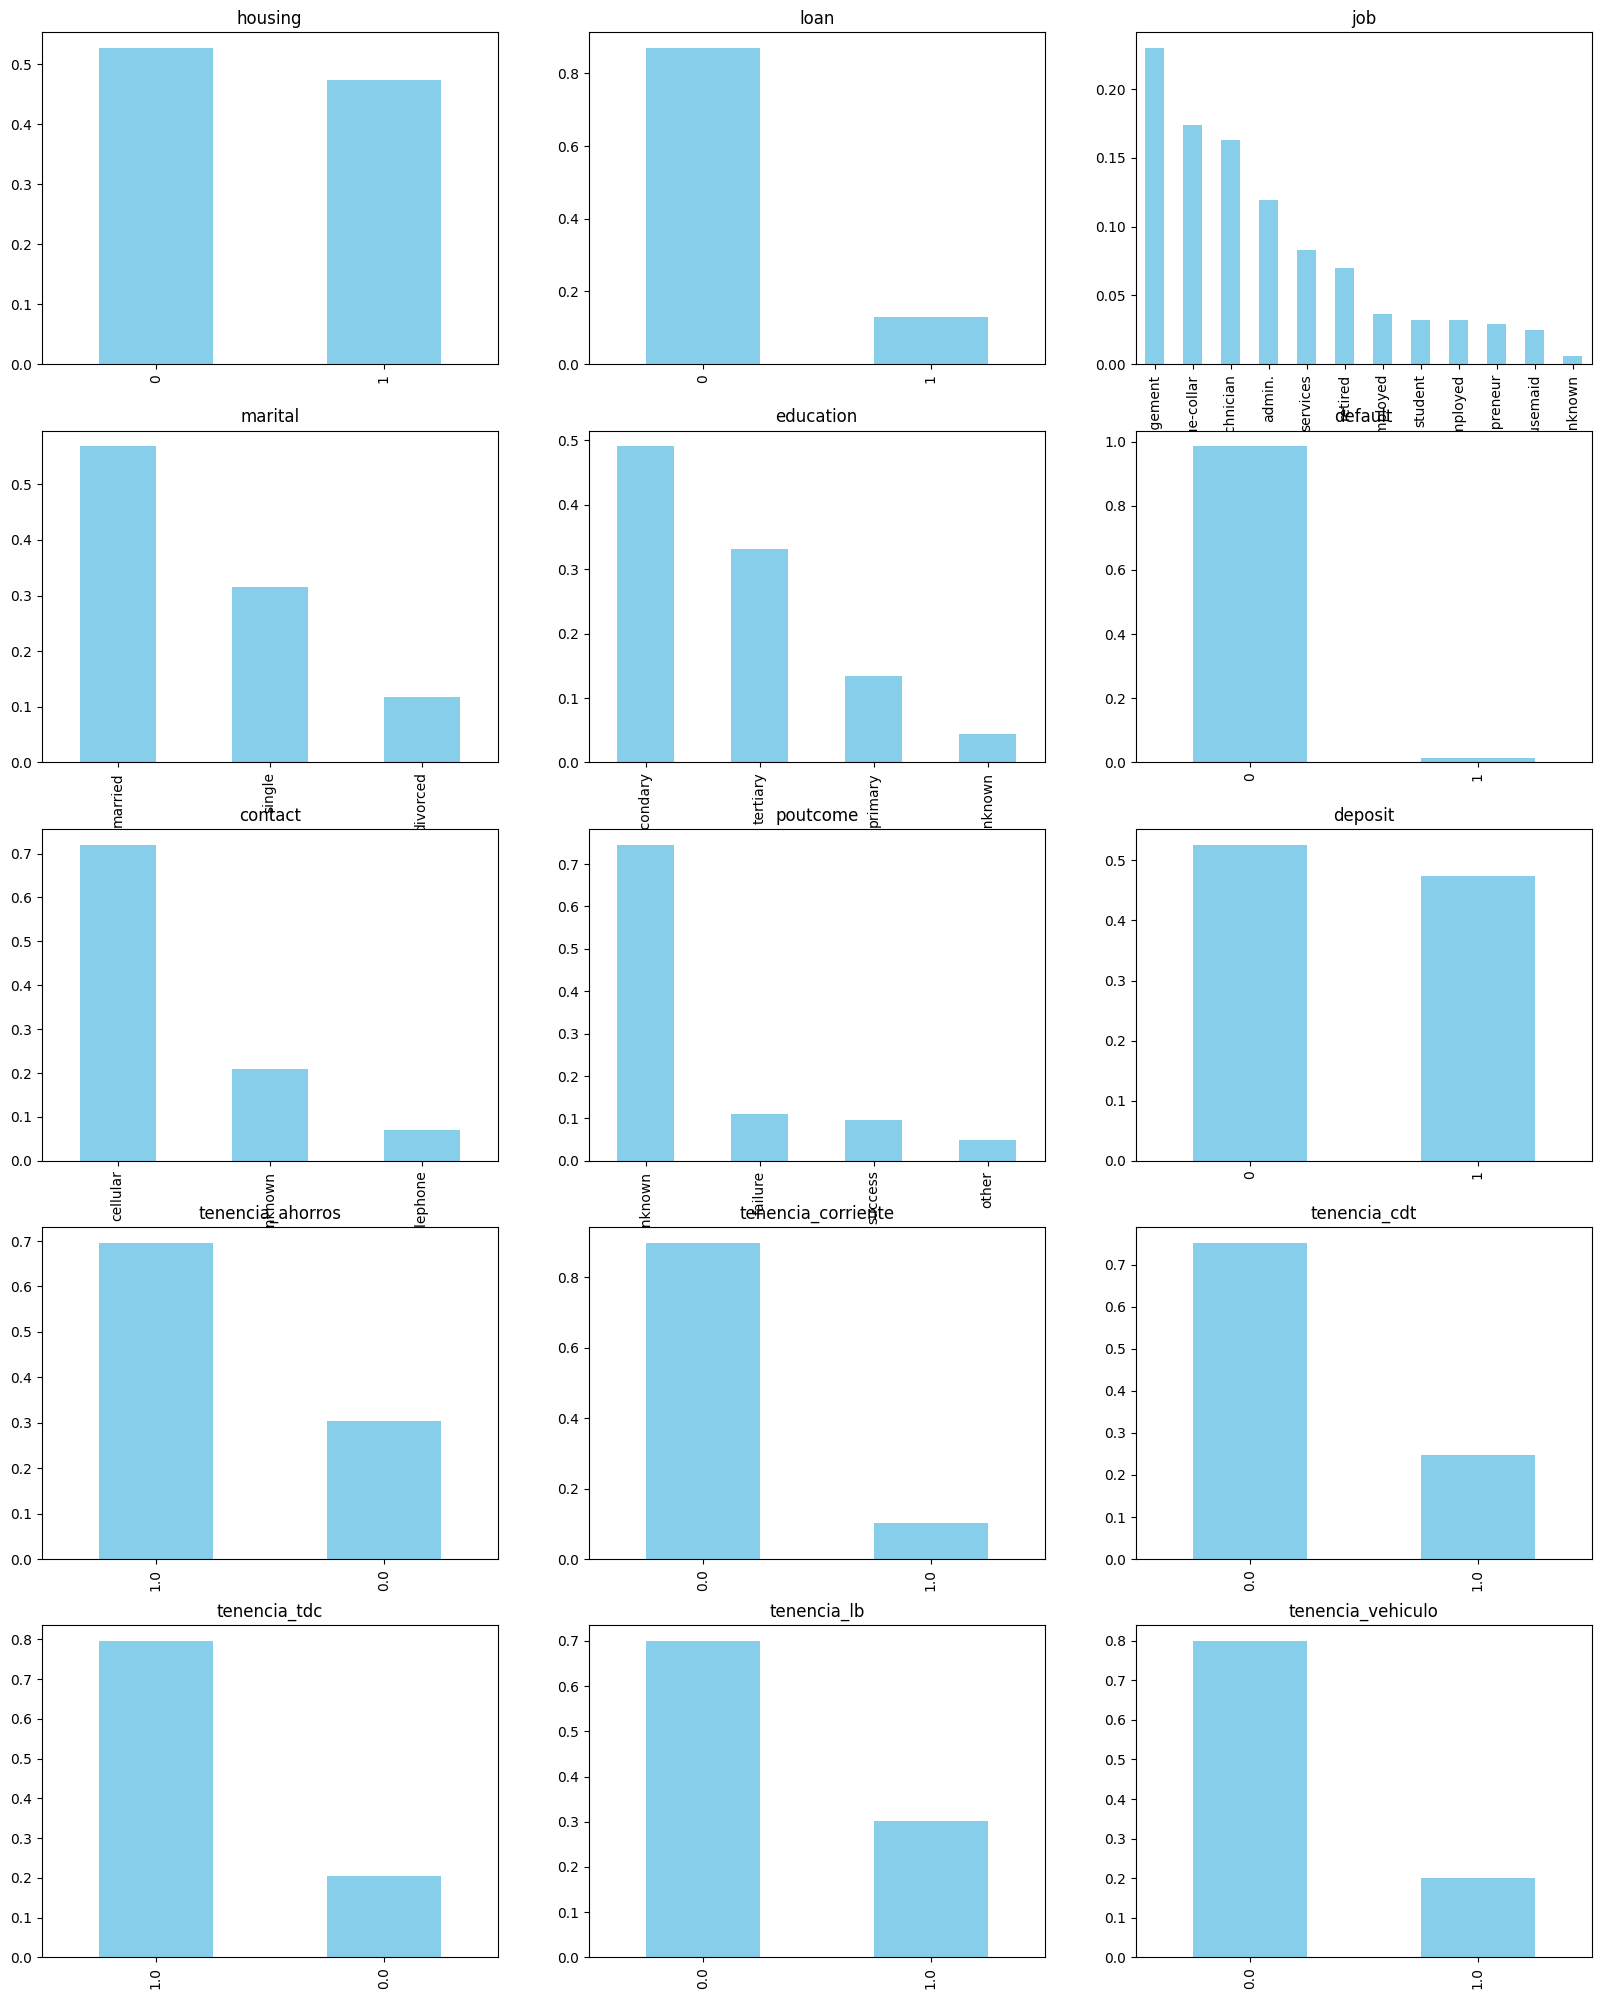

In [75]:
variables_cat = ['housing', 'loan', 'job', 'marital', 'education', 'default','contact', 'poutcome',
                 'deposit', 'tenencia_ahorros', 'tenencia_corriente', 'tenencia_cdt', 'tenencia_tdc',
                 'tenencia_lb', 'tenencia_vehiculo']

plt.figure(figsize=(20,25))
for i,var in enumerate(variables_cat):
    plt.subplot(5,3,i+1)
    df[var].value_counts(normalize=True).plot(kind='bar',color="skyblue", title=var)

Se puede inferir de los graficos anteriores que:
* El 86% de los clientes de base no tienen un crédito de libre inversión.
* El 56% de los clientes de la base de datos estan casados.
* El 49% de los clientes de la base tienen educación secundaria.
* EL 98% de los clientes de la base no tiene créditos en mora.
* El 72% de los clientes tuvo contacto por el celular para el ofrecimiento del producto.
* Se desconoce en el 75% de los clientes de la base el resultado de la última campaña comercial (var **poutcome**).
* El 52% de los clientes de la base tiene tarjeta débito.
* Alrededor del 70% de los clientes de la base tienen una cuenta de ahorro o una tarjeta de crédito con nosotros.
* Más del 70% de los clientes de la base no tiene una cuenta corriente o un cdt o un crédito de vehículo con nosotros.

In [108]:
df['job'].value_counts(normalize=True)

management       0.229887
blue-collar      0.174162
technician       0.163322
admin.           0.119513
services         0.082691
retired          0.069701
self-employed    0.036284
student          0.032252
unemployed       0.031984
entrepreneur     0.029385
housemaid        0.024548
unknown          0.006271
Name: job, dtype: float64

### Analisis univariado de las variables cuantitativas

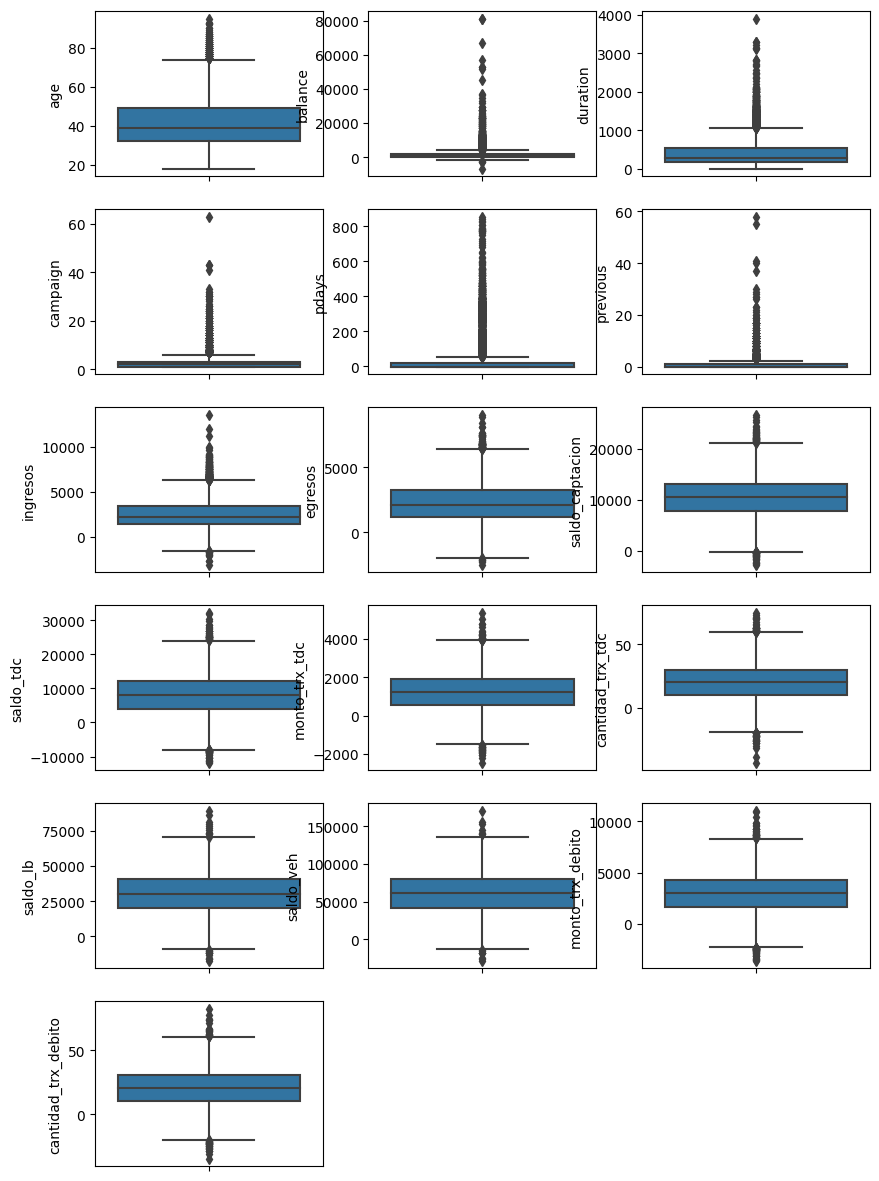

In [217]:
# Grafico de violines para algunas variables cuantitativas según Housing
variables_num = ["age", 'balance', 'duration',
                 'campaign', 'pdays','previous','ingresos',
                 'egresos', 'saldo_captacion', 'saldo_tdc',
                 'monto_trx_tdc','cantidad_trx_tdc', 'saldo_lb', 'saldo_veh',
                 'monto_trx_debito', 'cantidad_trx_debito']

plt.figure(figsize=(10,15))
for i,var in enumerate(variables_num):
    plt.subplot(6,3,i+1)
    sns.boxplot(y= var,data= df )

In [107]:
df.describe(include=[np.number])

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,tenencia_ahorros,tenencia_corriente,tenencia_cdt,tenencia_tdc,tenencia_lb,tenencia_vehiculo,ingresos,egresos,saldo_captacion,saldo_tdc,monto_trx_tdc,cantidad_trx_tdc,saldo_lb,saldo_veh,monto_trx_debito,cantidad_trx_debito
count,11162.000000,11162.000000,8884.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,10612.000000,10601.000000,10590.000000,10599.000000,10639.000000,10589.000000,8950.000000,8896.000000,7972.000000,8016.000000,7983.000000,7980.000000,3357.000000,2238.000000,7279.000000,7275.000000
mean,41.231948,0.015051,1585.878558,0.473123,0.130801,401.981720,2.508421,51.330407,0.832557,0.473840,0.695816,0.101877,0.248159,0.795735,0.300592,0.201058,2480.927582,2254.691972,10530.469385,8035.747659,1214.676085,20.005482,30385.703271,60792.063849,3009.643796,20.132298
std,11.913369,0.121761,3313.185954,0.499299,0.337198,347.280631,2.722077,108.758282,2.292007,0.499338,0.460083,0.302501,0.431965,0.403182,0.458537,0.400810,1588.880494,1575.013127,4007.126805,6033.023165,996.186860,15.031332,14982.656745,28029.765769,1997.271643,14.974287
min,18.000000,0.000000,-6805.221395,0.000000,0.000000,-1.353598,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3090.885131,-2506.104373,-2687.247223,-11769.150440,-2456.440099,-43.497472,-17300.361753,-28294.008605,-3589.716813,-34.846601
25%,32.000000,0.000000,172.321525,0.000000,0.000000,168.976855,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1394.059413,1152.968416,7824.681827,4003.590138,532.191433,10.117232,20345.487496,42240.956708,1662.963847,10.016728
50%,39.000000,0.000000,604.052362,0.000000,0.000000,286.480152,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2184.790669,2116.438560,10551.903937,8030.458153,1226.634742,19.994614,30389.999913,60876.765020,3034.719315,20.258919
75%,49.000000,0.000000,1772.260058,1.000000,0.000000,526.382523,3.000000,20.750000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3364.989852,3267.768734,13166.739198,11996.450428,1890.894042,29.996303,40493.833423,80033.606630,4322.363760,30.331647
max,95.000000,1.000000,81269.474223,1.000000,1.000000,3892.988687,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13546.541070,9078.899129,26637.625667,32161.094267,5368.117678,74.896488,89379.040561,170840.875713,11053.698089,82.521765


Se presentan valores atipicos en todas las variables, por ejemplo en la variable edad se presenta valores atípicos en las edades más altas, esto se debe a que no es común tener clientes mayores de 70 años.

La variable balance, presentan una gran cantidad de valores atipicos positivos, ya que parece no ser común que el saldo en el sistema bancario sea tan alto.

Las variables relacionadas con el ofrecimiento de servicios duration, campaign y previous presentan gran cantidad de valores atipicos, esto puede ser debido a que al tener mayor duración en la llamada influya en el numero de contactos realizados y tal vcez esto se vea reflejado en el resultado de la última campaña comercial (poutcome), sin embargo esta variable presenta muchos valores desconocidos.

## Análisis bivariado
Con la información analizada anteriormente se pueden generar algunas hipotesis:

* Los clientes con mayores ingresos pueden tener algún tipo de crédito.
* Las personas con mayor nivel de escolaridad tienen mayores ingresos.
* Las persona con cierto tipo de trabajo pueden tener mejores ingresos.

Intentemos probar estos hipoteiss utilizando un análisis vibariado.

## Análisis bivariado con la variable de respuesta Housing

<Figure size 2000x2500 with 0 Axes>

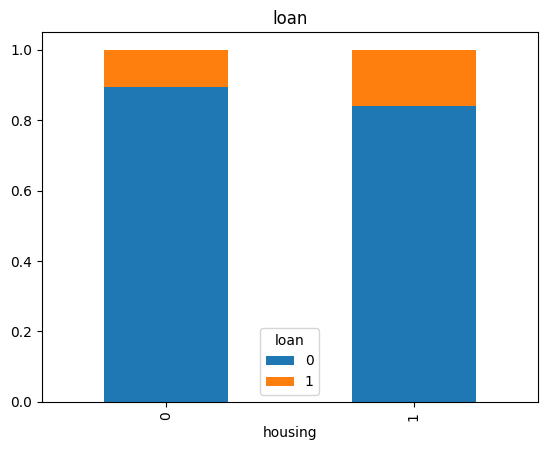

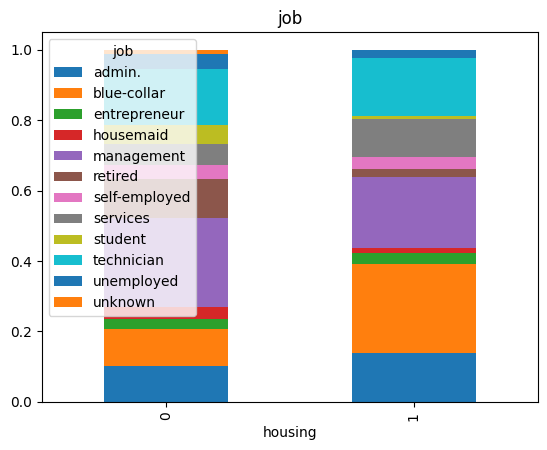

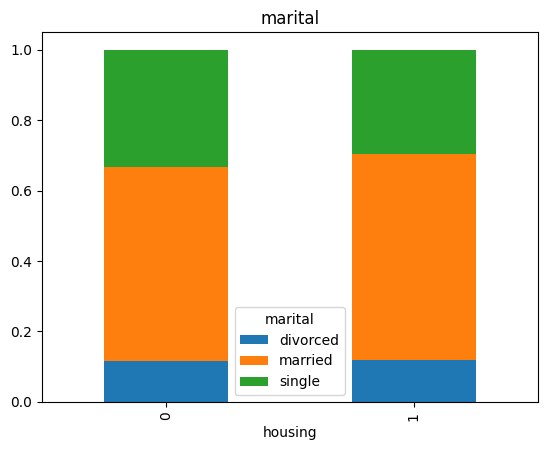

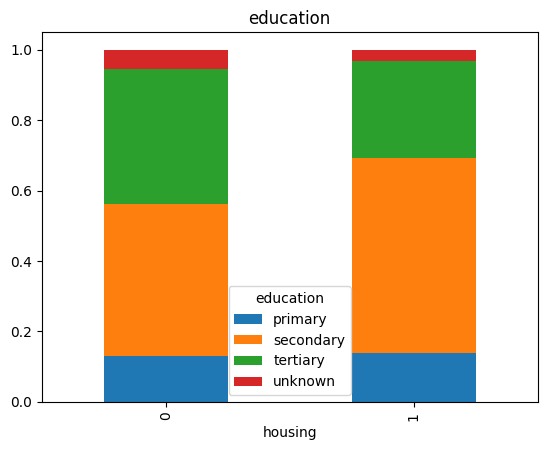

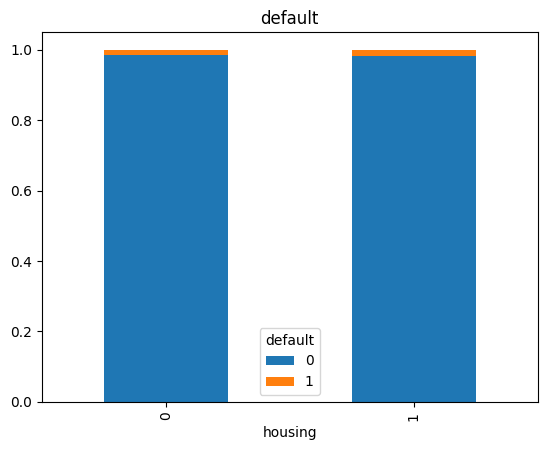

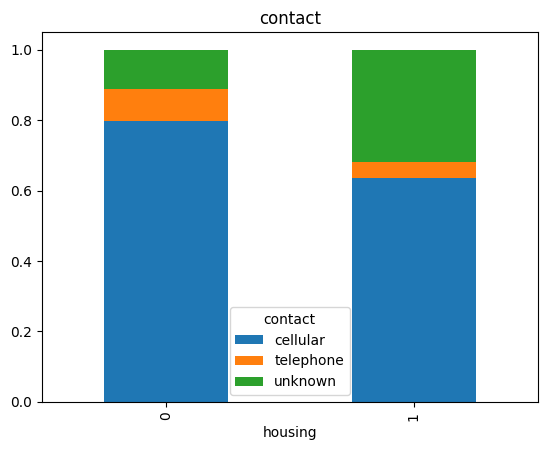

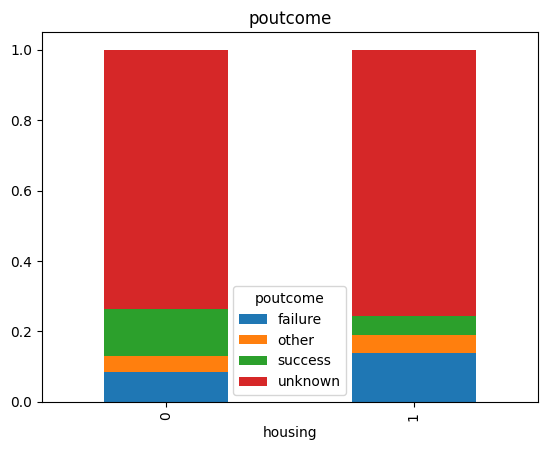

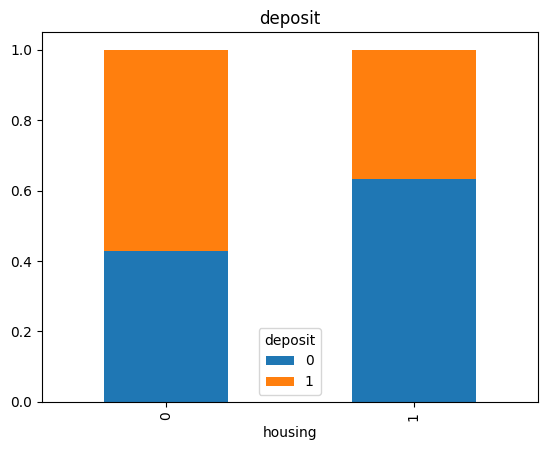

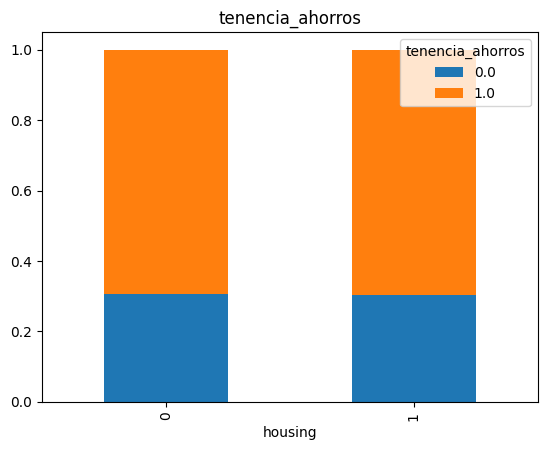

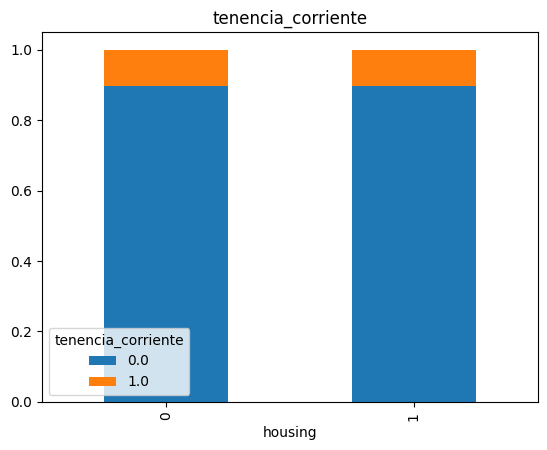

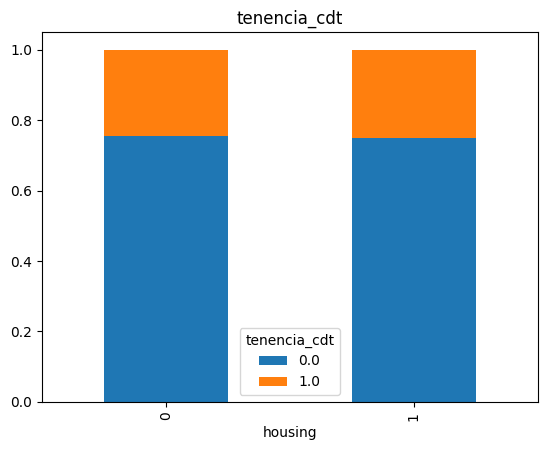

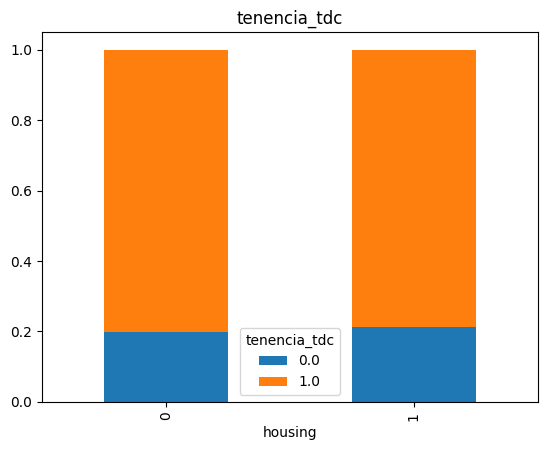

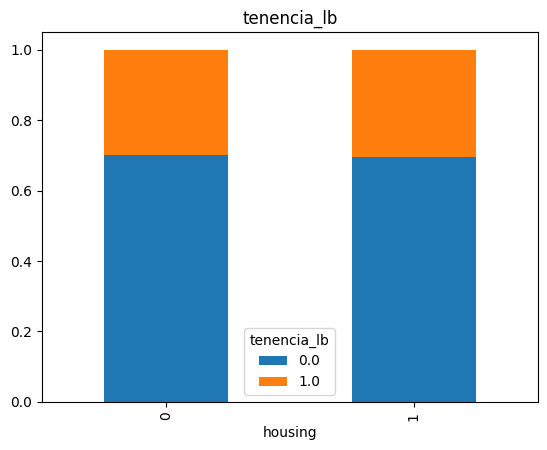

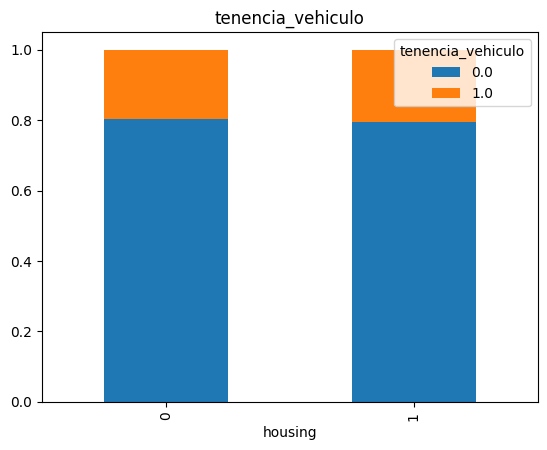

In [161]:
# Diagramas de cajas para algunas variables cualitativas según los ingresos
variables_cat_nohousing = ['loan', 'job', 'marital', 'education', 'default','contact', 'poutcome',
                'deposit', 'tenencia_ahorros', 'tenencia_corriente', 'tenencia_cdt', 'tenencia_tdc',
                'tenencia_lb', 'tenencia_vehiculo']
#['loan', 'job', 'marital', 'education', 'default','contact', 'poutcome',
      #           'deposit', 'tenencia_ahorros', 'tenencia_corriente', 'tenencia_cdt', 'tenencia_tdc',
       #          'tenencia_lb', 'tenencia_vehiculo']
        
plt.figure(figsize=(20,25))
for i,var in enumerate(variables_cat_nohousing):
   # plt.subplot(1,2,i+1)
    #tabla_cruzada = pd.crosstab(index=df['housing'],columns = df[var], margins='True')
    #tabla_cruzada.plot(kind='bar',stacked=True)
    graf=pd.crosstab(df['housing'],df[var])
    graf.div(graf.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title= var)
    plt.show()

Observaciones al realizar el analisis bivariado entre las variables cualitativas y la variable housing
* El 15% de los clientes que tienen credito de vivienda también tienen crédito de libre inversión, sin embargo muy pocos de los clientes tienen credito de libre inversion.
* El 55% de los clientes que tienen educacion secundaria tienen un credito de vivienda.
* El 63% de las personas que tienen credito de vivienda no tienen tarjetas de credito.
* El tipo de empleo se comporta de una manera similar para las personas tengan o no credito de vivienda

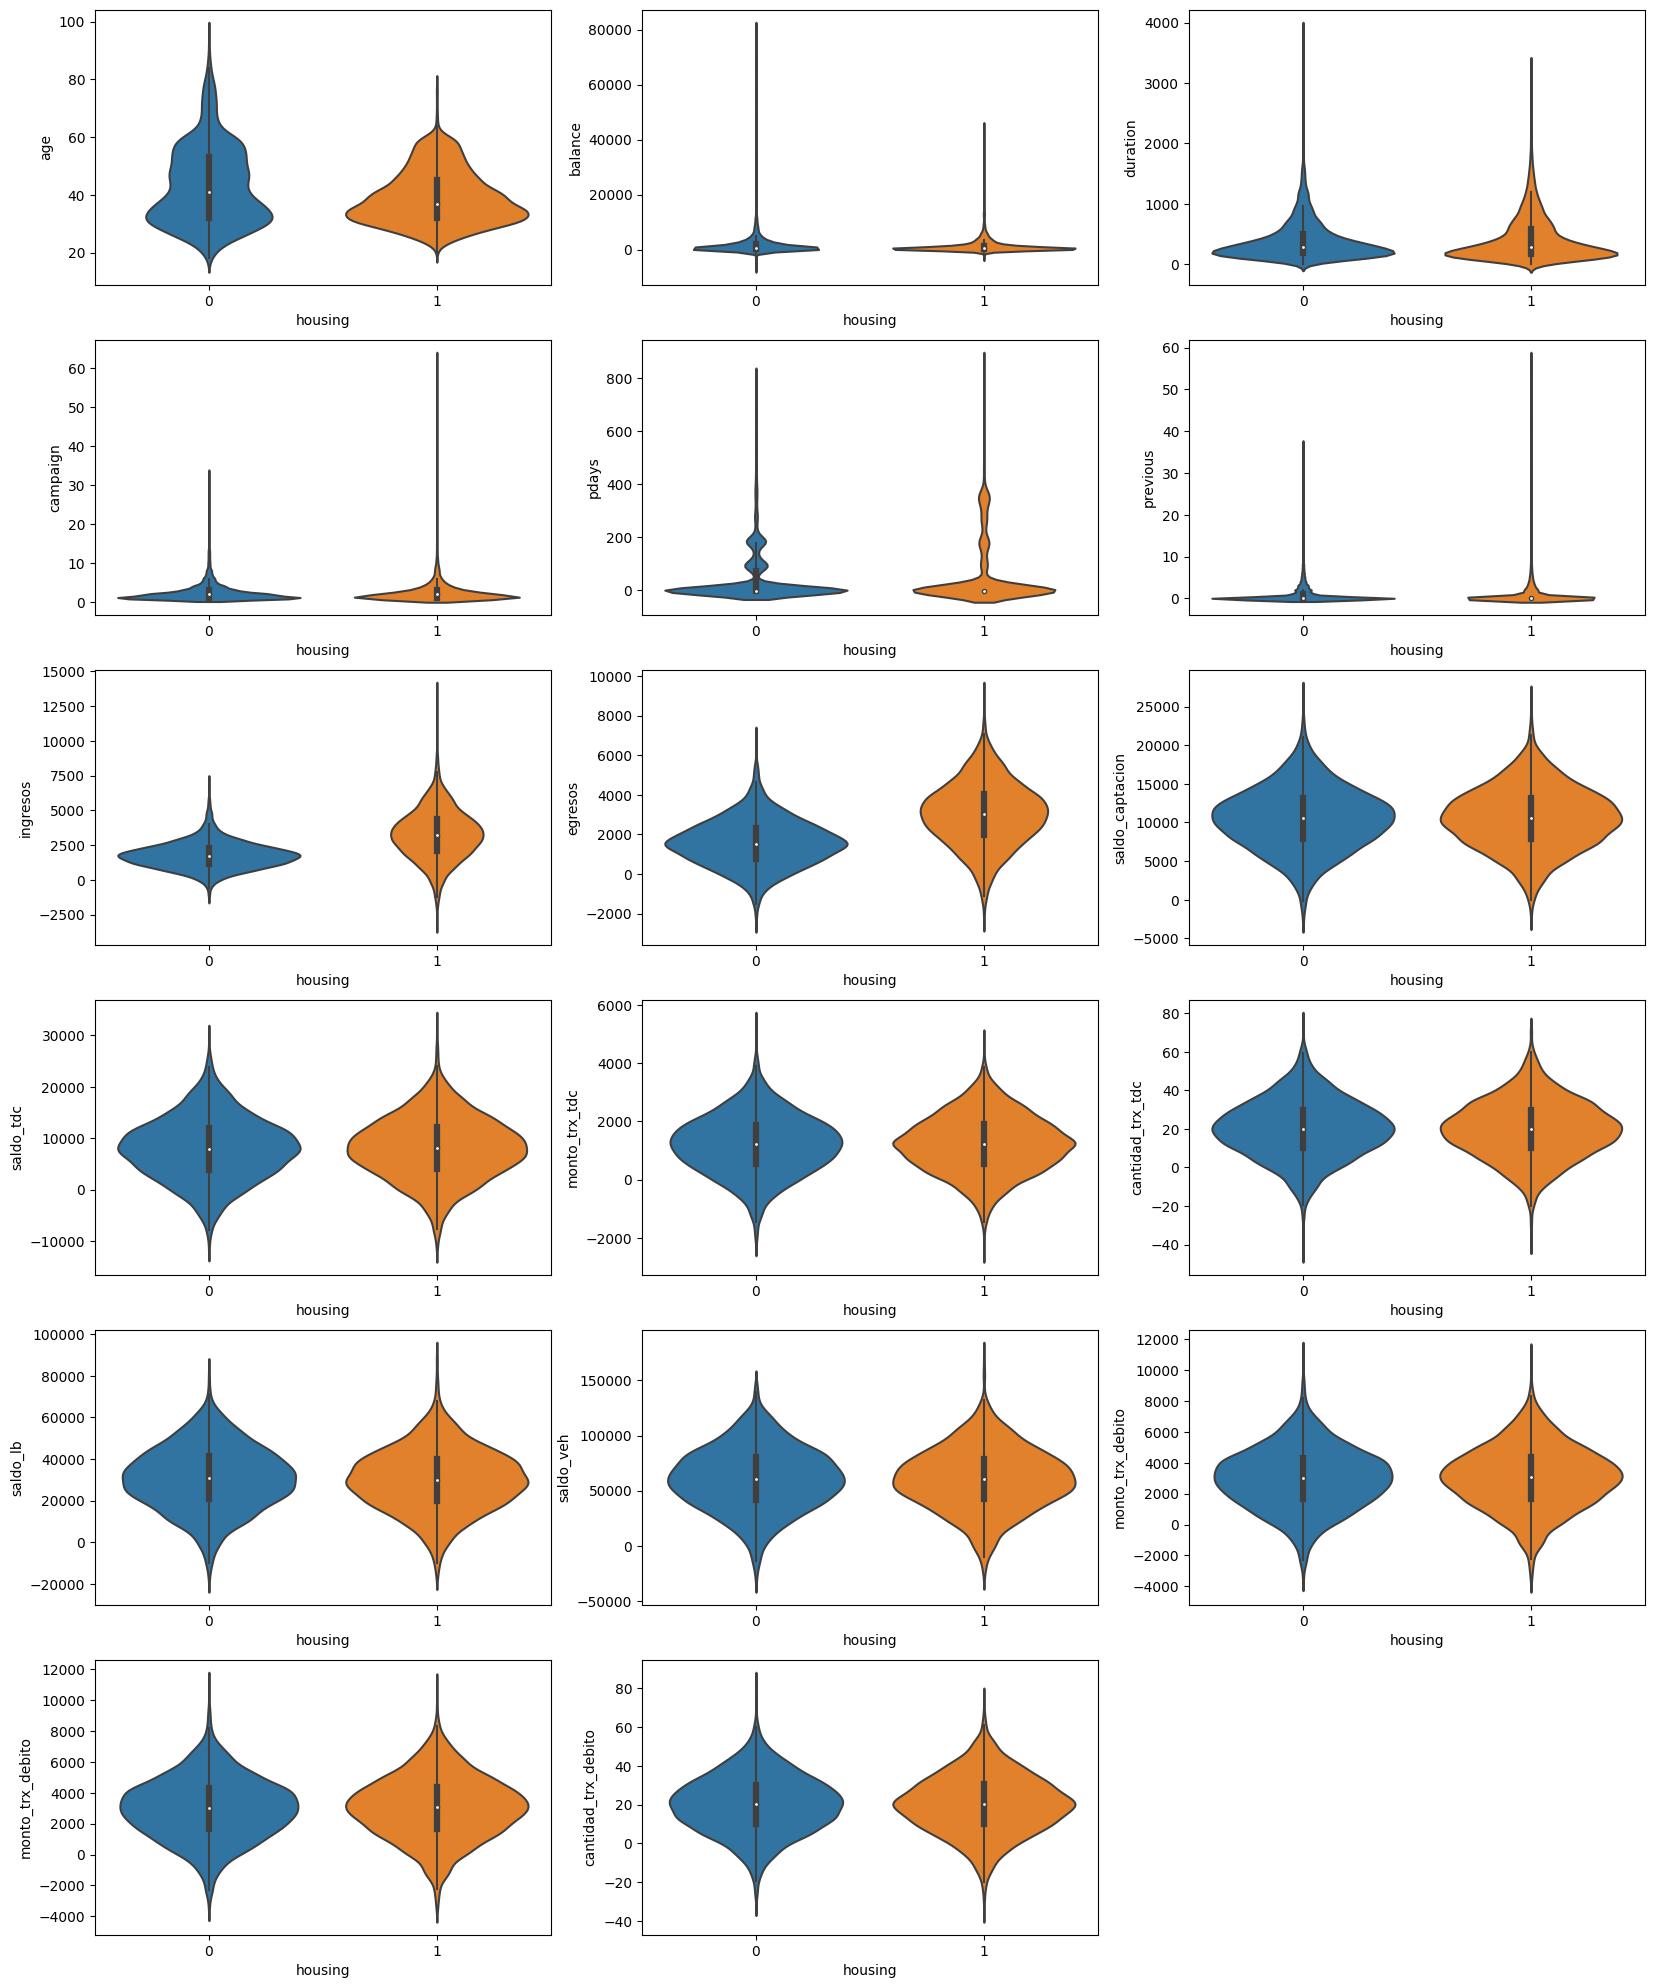

In [176]:
# Grafico de violines para algunas variables cuantitativas según Housing
variables_num = ["age", 'balance', 'duration',
                 'campaign', 'pdays','previous','ingresos',
                 'egresos', 'saldo_captacion', 'saldo_tdc',
                 'monto_trx_tdc','cantidad_trx_tdc', 'saldo_lb', 'saldo_veh',
                 'monto_trx_debito', 'monto_trx_debito', 'cantidad_trx_debito']


plt.figure(figsize=(20,25))
for i,var in enumerate(variables_num):
    plt.subplot(6,3,i+1)
    sns.violinplot(x= 'housing',y= var,data= df ,kind = "violin", inner = "box")

* Las mayoría de personas que tienen crédito de vivienda tienen menores edades comparadas con las que no tienen este crédito.
* El 55% de los clientes que tienen educación secundaria tienen un crédito de vivienda.
* El 63% de las personas que tienen credito de vivienda no tienen tarjetas de credito.
* Los clientes que tienen crédito de vivienda alcanzan los valores más altos en sus ingresos.

## Análisis bivariado con la variable de respuesta Loan

<Figure size 2000x2500 with 0 Axes>

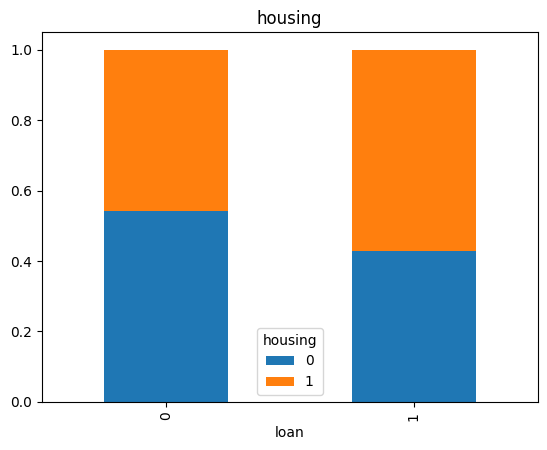

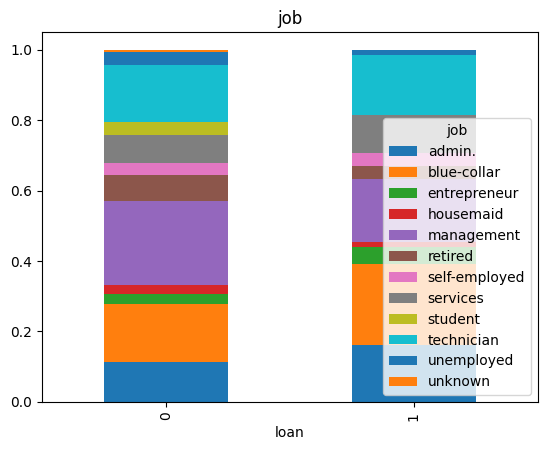

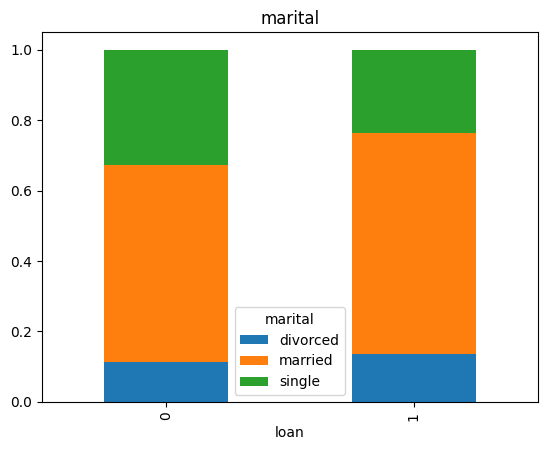

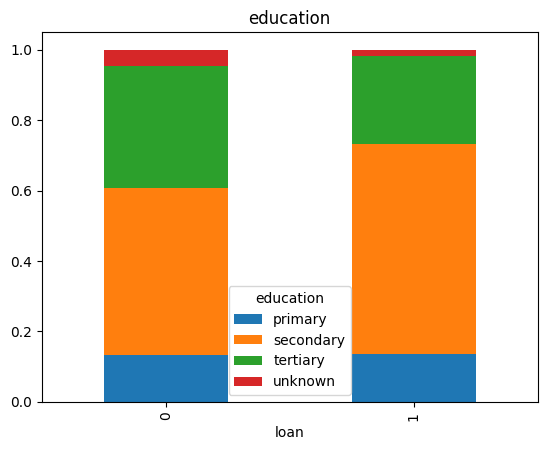

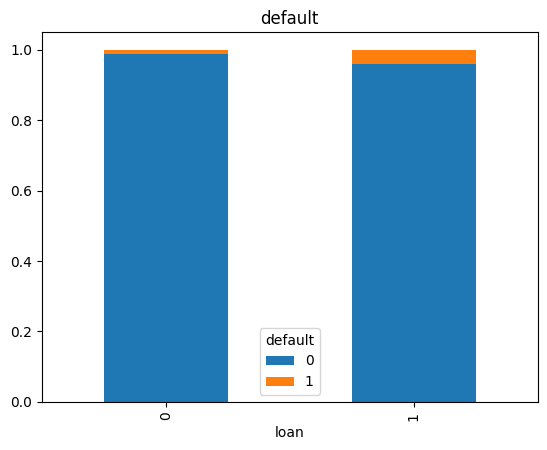

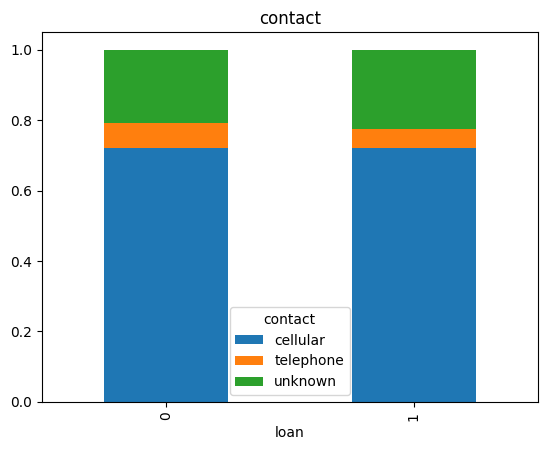

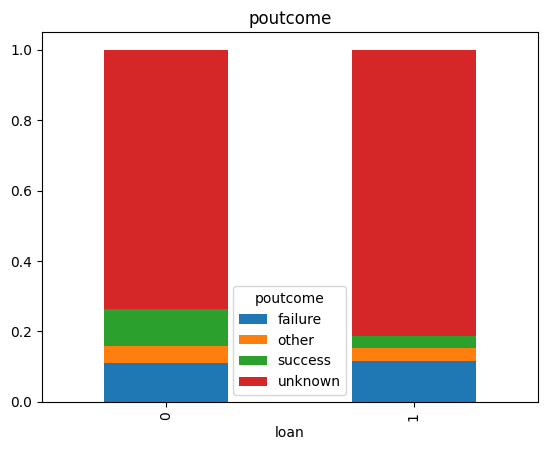

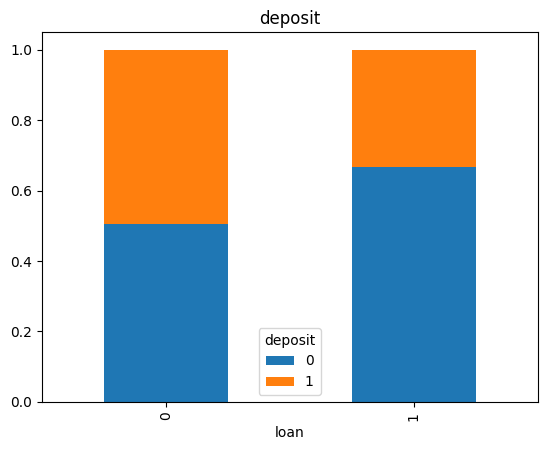

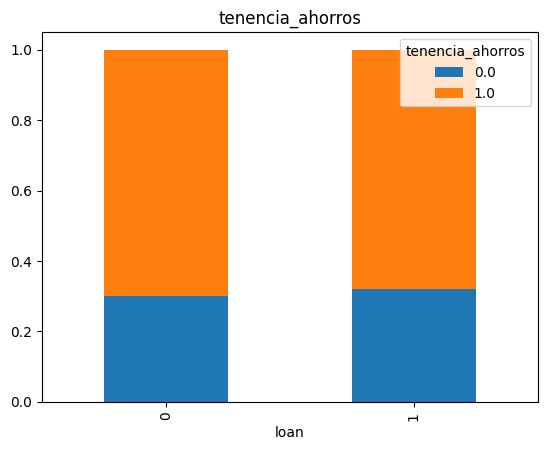

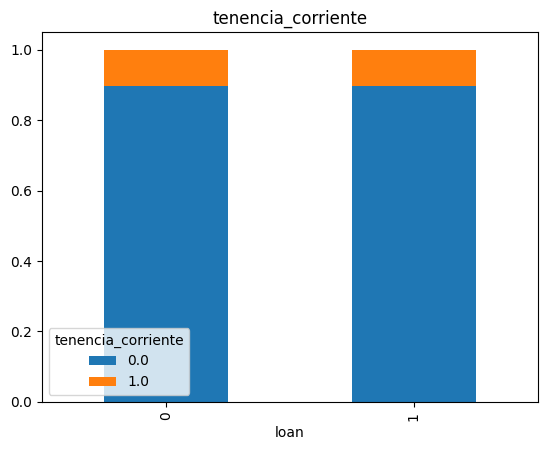

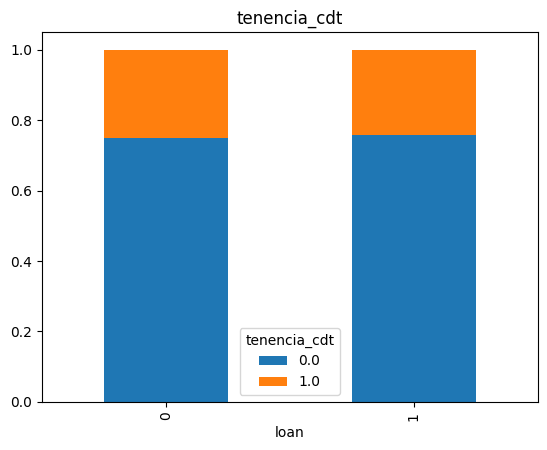

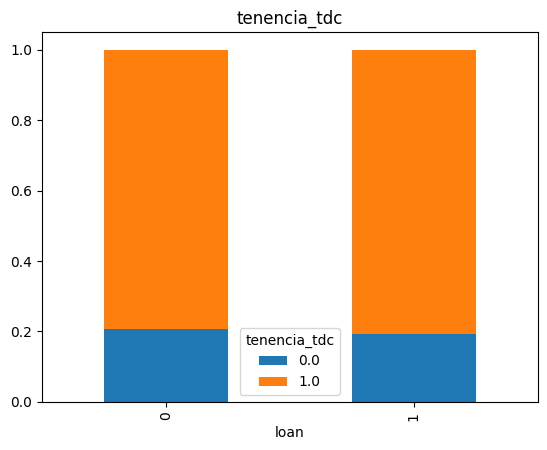

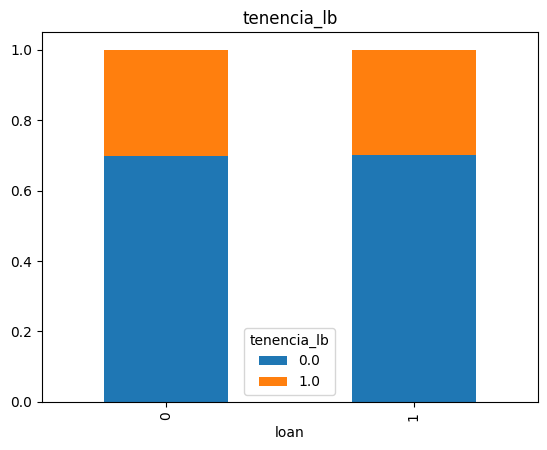

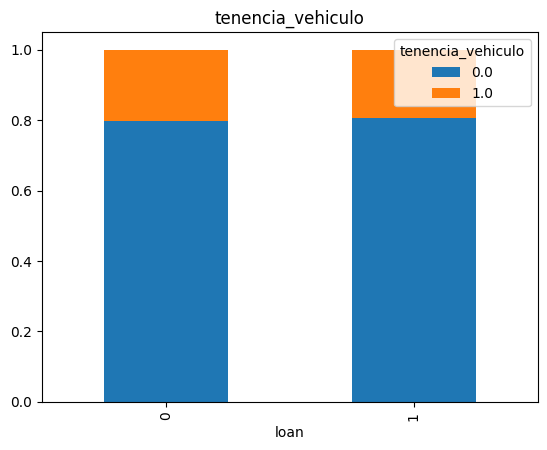

In [183]:
# Diagramas de cajas para algunas variables cualitativas según los ingresos
variables_cat_noloan = ['housing', 'job', 'marital', 'education', 'default','contact', 'poutcome',
                'deposit', 'tenencia_ahorros', 'tenencia_corriente', 'tenencia_cdt', 'tenencia_tdc',
                'tenencia_lb', 'tenencia_vehiculo']
#['loan', 'job', 'marital', 'education', 'default','contact', 'poutcome',
      #           'deposit', 'tenencia_ahorros', 'tenencia_corriente', 'tenencia_cdt', 'tenencia_tdc',
       #          'tenencia_lb', 'tenencia_vehiculo']
        
plt.figure(figsize=(20,25))
for i,var in enumerate(variables_cat_noloan):
   # plt.subplot(1,2,i+1)
    #tabla_cruzada = pd.crosstab(index=df['housing'],columns = df[var], margins='True')
    #tabla_cruzada.plot(kind='bar',stacked=True)
    graf=pd.crosstab(df['loan'],df[var])
    graf.div(graf.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, title= var)
    plt.show()

Observaciones al realizar el analisis bivariado entre las variables cualitativas y la variable loan
* El 62% de los clientes que tienen crédito de libre inversión están casados.
* El 59% de los clientes que tienen crédito de libre inversión su nivel de educación es secundaria.
* EL 66% de los clientes con crédito de libre inversión no tiene tarjetas débito.

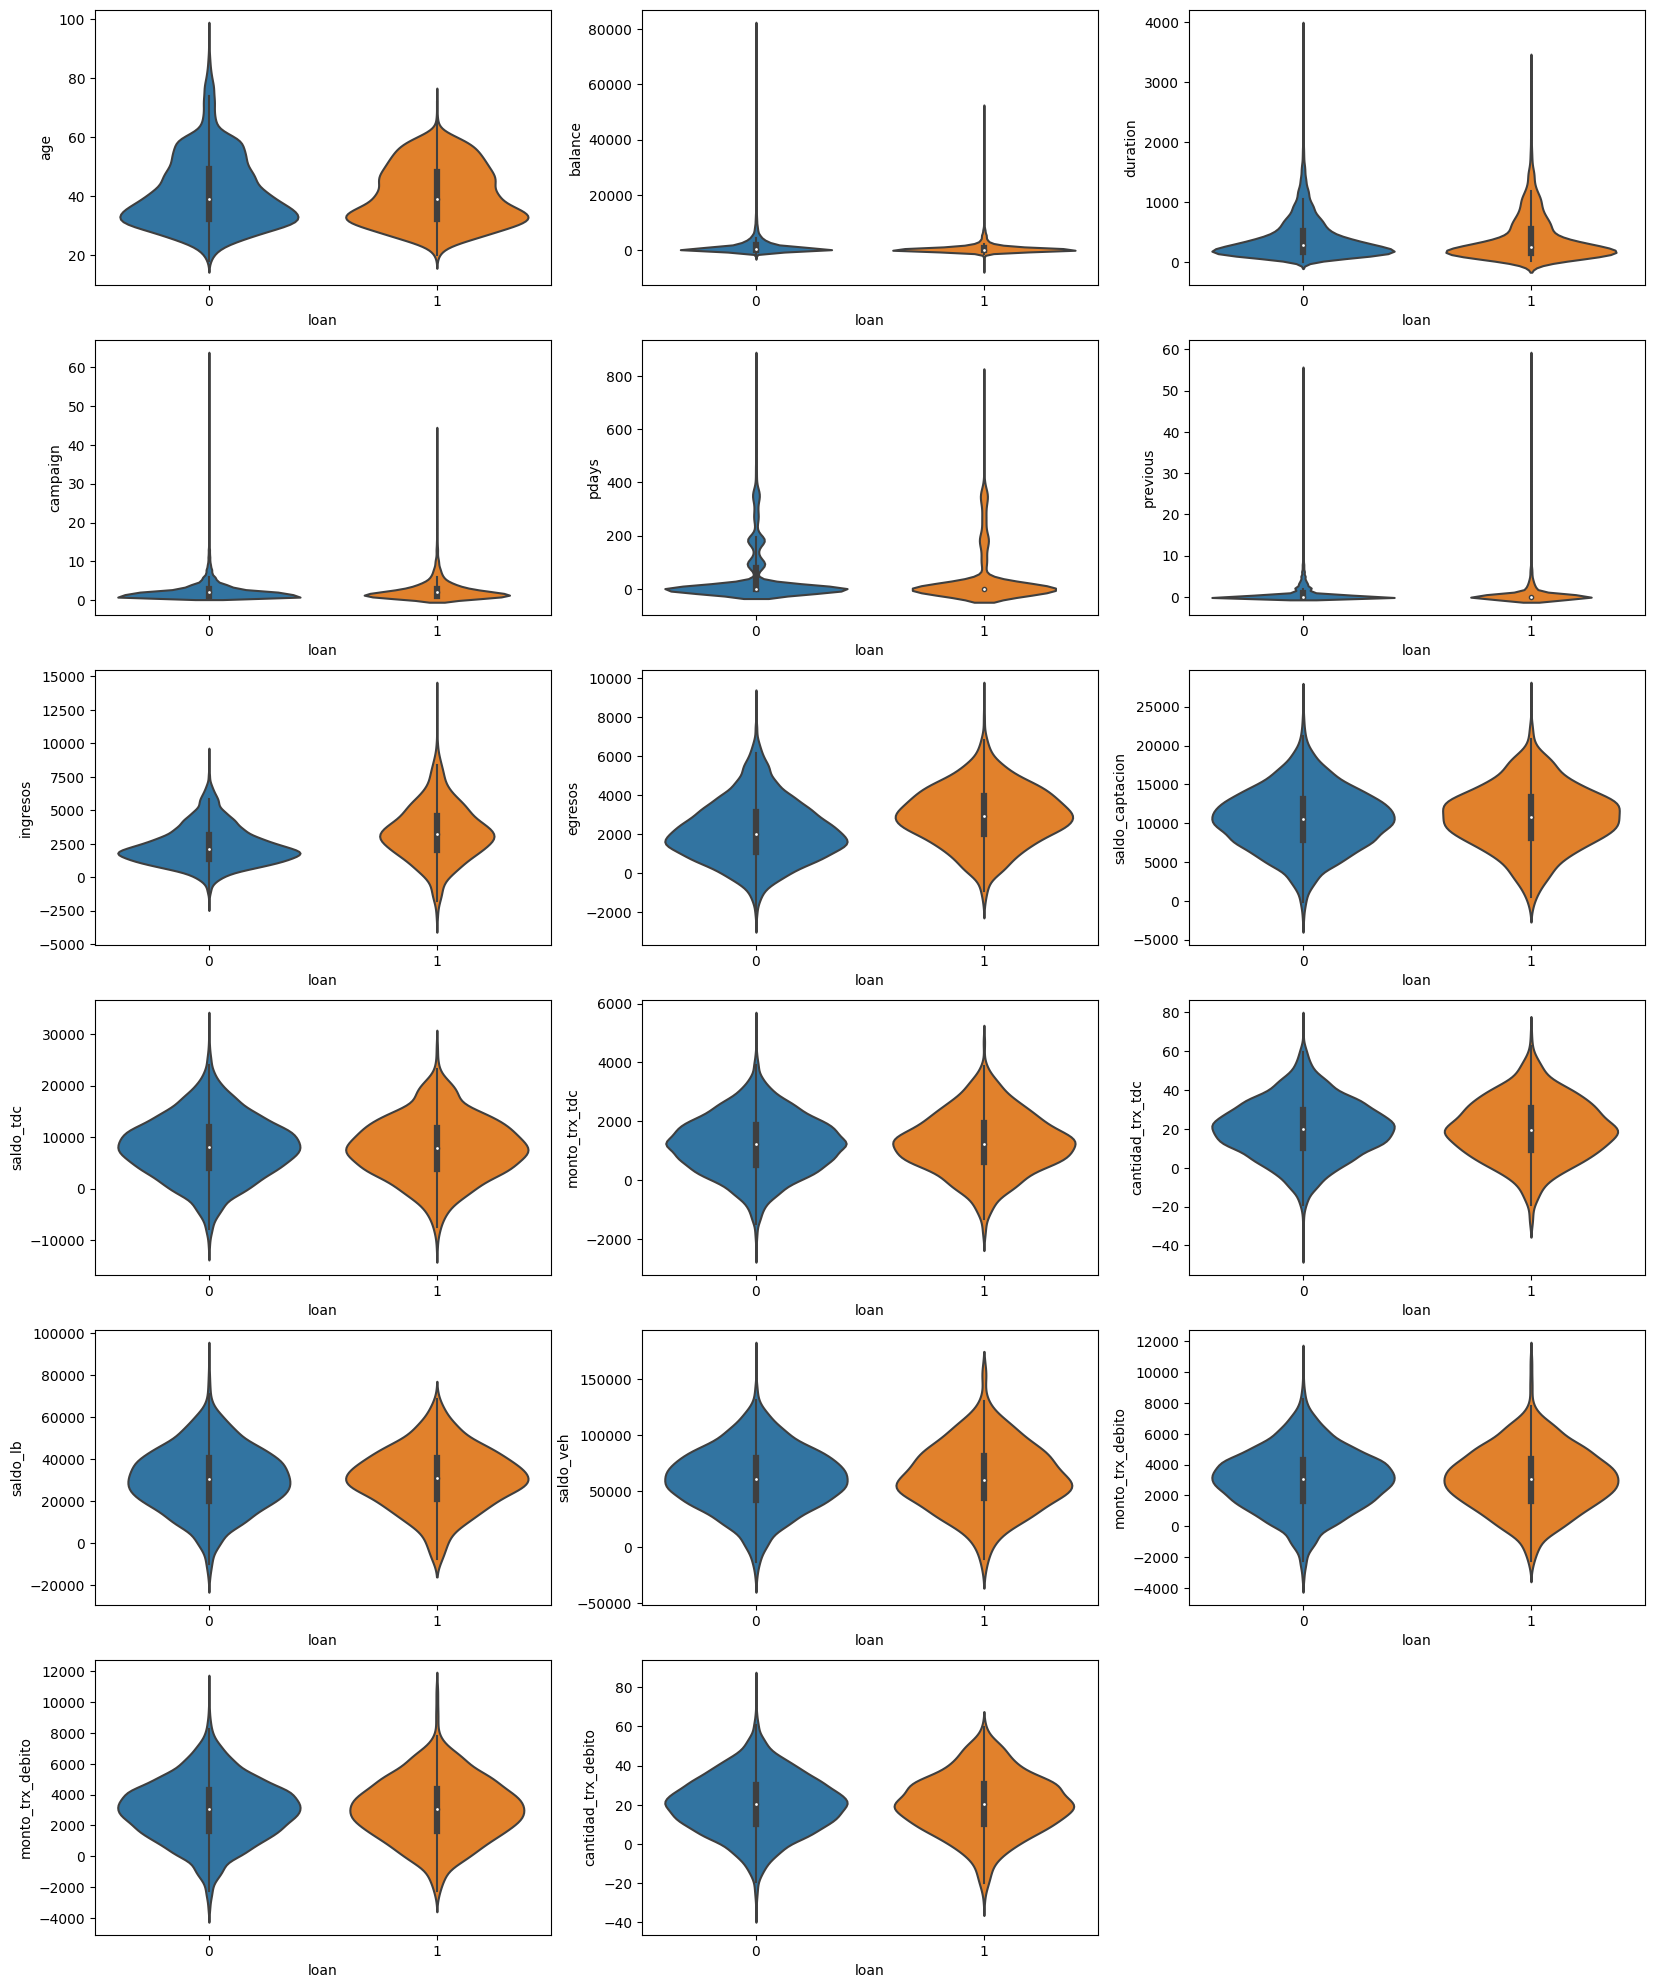

In [191]:
# Grafico de violines para algunas variables cuantitativas según Housing
variables_num = ["age", 'balance', 'duration',
                 'campaign', 'pdays','previous','ingresos',
                 'egresos', 'saldo_captacion', 'saldo_tdc',
                 'monto_trx_tdc','cantidad_trx_tdc', 'saldo_lb', 'saldo_veh',
                 'monto_trx_debito', 'monto_trx_debito', 'cantidad_trx_debito']


plt.figure(figsize=(20,25))
for i,var in enumerate(variables_num):
    plt.subplot(6,3,i+1)
    sns.violinplot(x= 'loan',y= var,data= df ,kind = "violin", inner = "box")

* Los clientes que alcanzan los saldos más altos en el sistema bancario no tienen crédito de libre inversión.
* Los clientes que alcanzan los ingresos más altos son aquellos que tienen crédito de libre inversión.

## Análisis adicionales bivariados

Para responder a algunas hipotesis que se tenian en el inicio

* Los clientes con mayores ingresos pueden tener algún tipo de crédito.

Al parecer los clientes que tienen algún tipo de crédito de vivienda, crédito de libre inversión, crédito de vehículo o tienen tarjeta de crédito alcanzan los mayores ingresos, sin embargo para los clientes que tienen crédito de libranza no presentan los mayores ingresos comparandolos con los que no tienen este tipo de crédito.

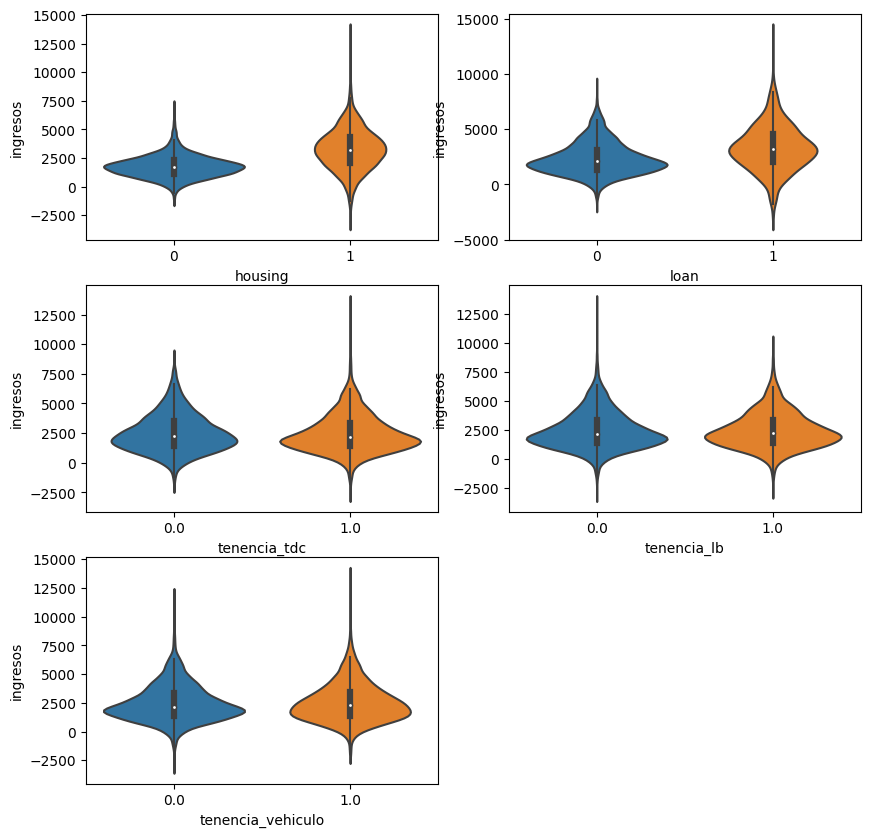

In [203]:
var_tenecia_credit = ['housing','loan','tenencia_tdc','tenencia_lb', 'tenencia_vehiculo']

plt.figure(figsize=(10,10))
for i,var in enumerate(var_tenecia_credit):
    plt.subplot(3,2,i+1)
    sns.violinplot(x= var, y= 'ingresos',data= df ,kind = "violin", inner = "box")

* Las personas con cierto tipo de trabajo tienen mayores ingresos.

Las personas con los trabajos services y blue collar alcanzan los menores y mayores ingresos comparados con las demás categorias. 

[Text(0, 0, 'admin.'),
 Text(1, 0, 'technician'),
 Text(2, 0, 'services'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'management'),
 Text(5, 0, 'unemployed'),
 Text(6, 0, 'entrepreneur'),
 Text(7, 0, 'retired'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'student'),
 Text(10, 0, 'housemaid'),
 Text(11, 0, 'unknown')]

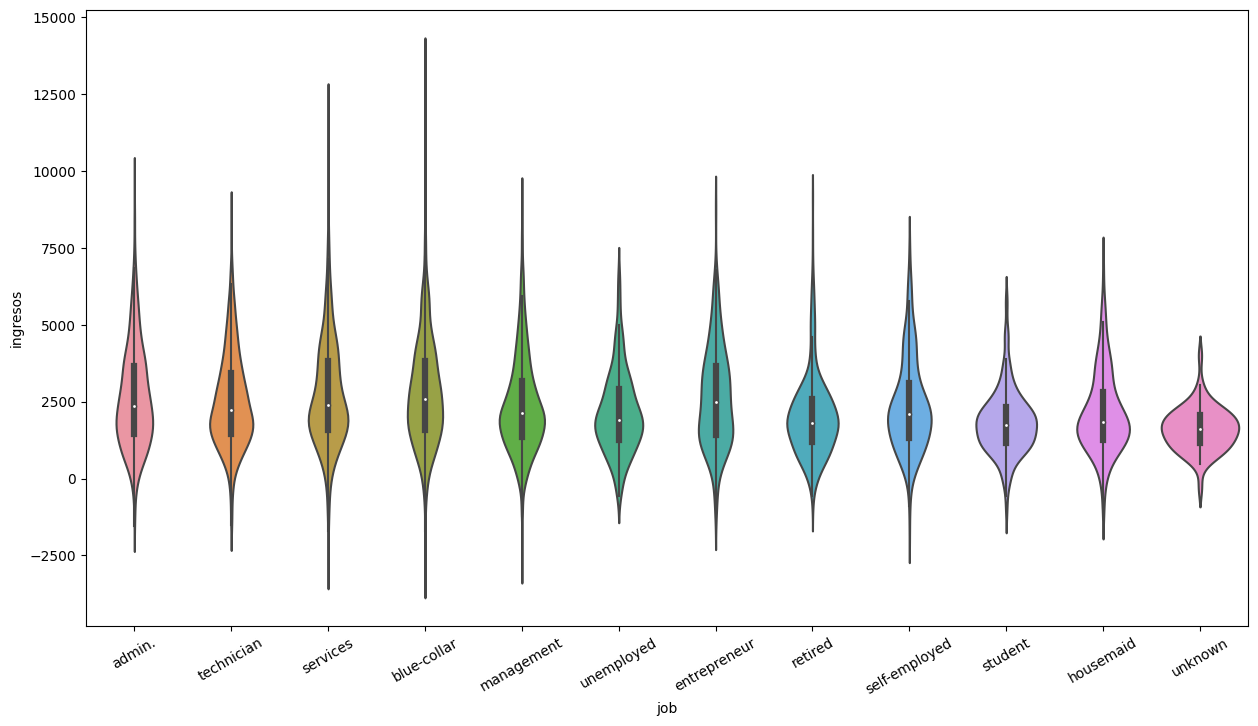

In [208]:
plt.figure(figsize = (15,8))
ax = sns.violinplot(x= 'job',y= 'ingresos',data= df ,kind = "violin", inner = "box")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

### Correlación entre variables

Ahora veamos la correlación entre todas las variables numéricas. por medio de un heatmap

<Axes: >

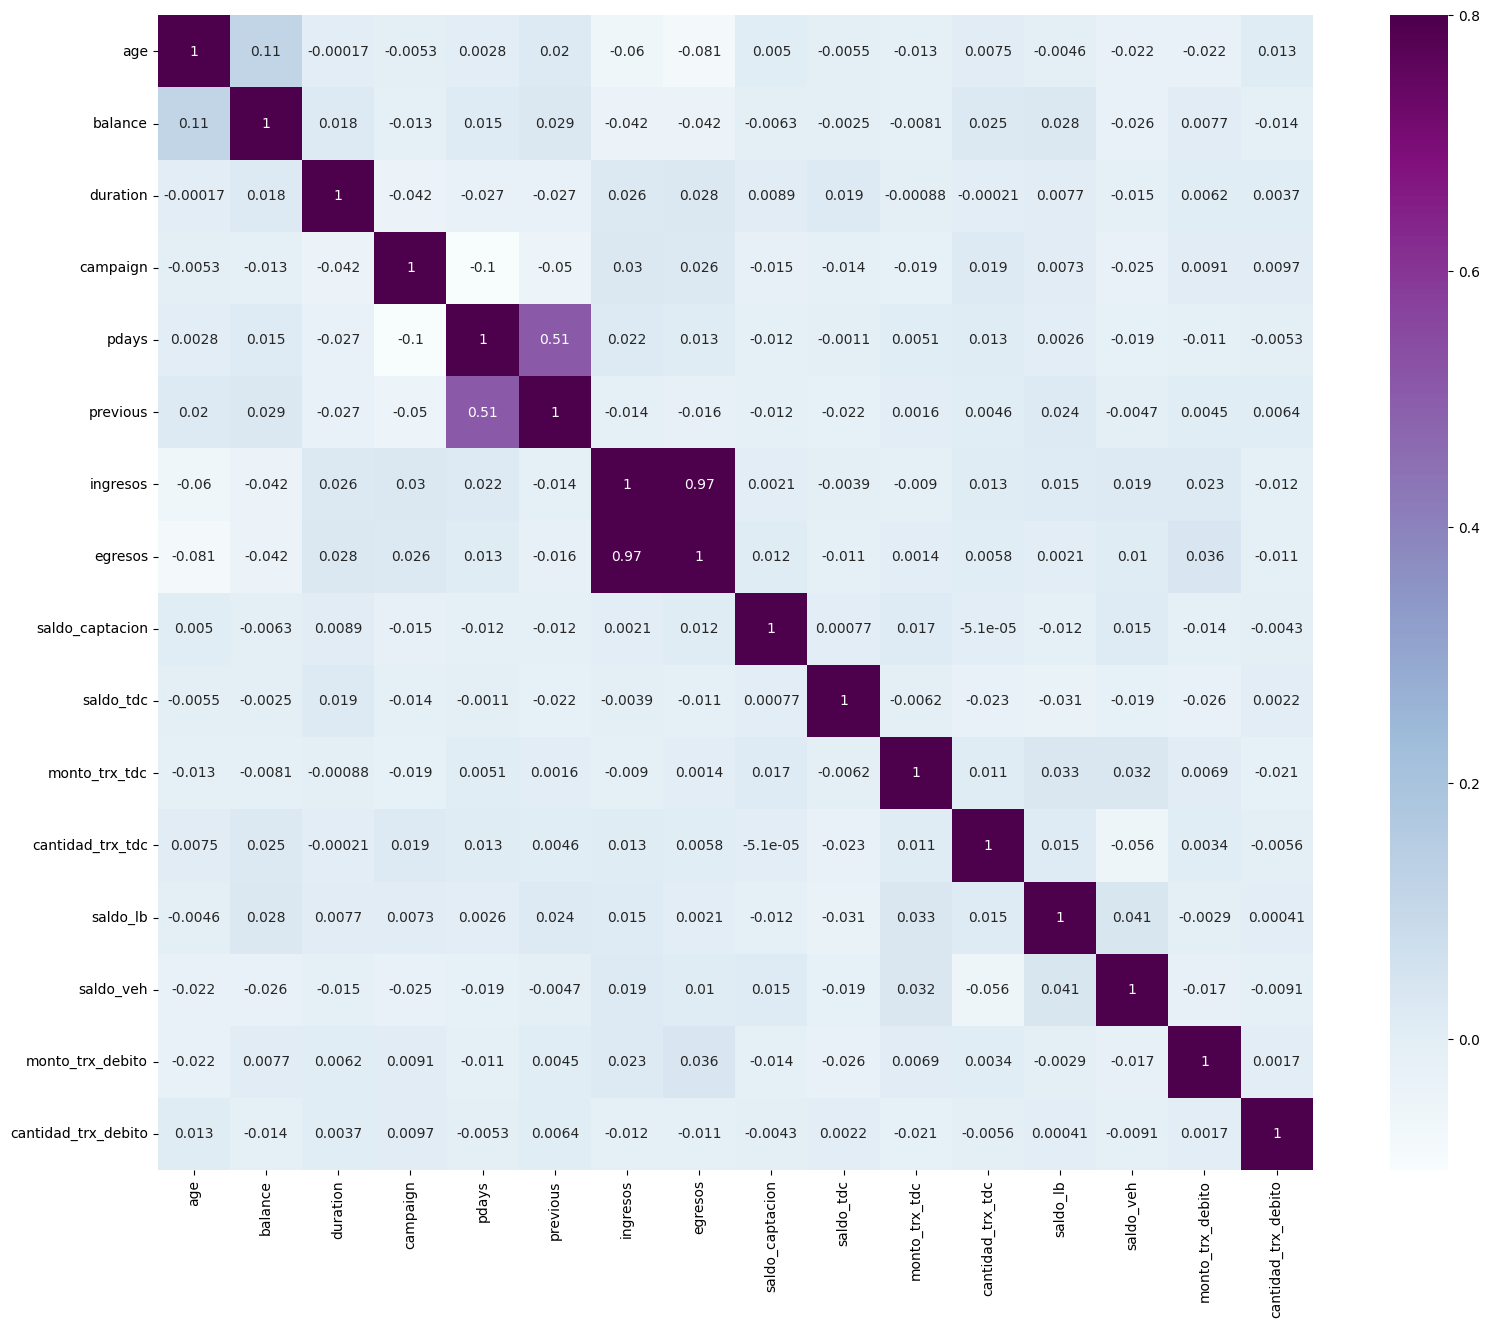

In [218]:
matrix = df[variables_num].corr()

f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

Existe una correlación muy alta entre los ingresos y los egresos de los clientes siendo del 97%, por otro lado hay una correlación del 51% entre número de contactos realizados en anteriores campañas comerciales y número de días desde último contacto en anteriores campañas comerciales

# Valores faltantes y tratamiento de valroes atípicos

## Análisis de valores faltantes

In [221]:
print('Numero completo de datos del data frame',df.missing.number_complete())
print('Numero completo de valores perdidos del data frame',df.missing.number_missing(), '(',round(df.missing.number_complete()/df.missing.number_missing(),1),'%)')

Numero completo de datos del data frame 294196
Numero completo de valores perdidos del data frame 51826 ( 5.7 %)


In [222]:
# Numero de valores faltantes por variable
df.missing.missing_variable_summary().sort_values('pct_missing',ascending=False)

,variable,n_missing,n_cases,pct_missing
28,saldo_veh,8924,11162,79.949830
27,saldo_lb,7805,11162,69.924745
30,cantidad_trx_debito,3887,11162,34.823508
29,monto_trx_debito,3883,11162,34.787672
23,saldo_captacion,3190,11162,28.579108
26,cantidad_trx_tdc,3182,11162,28.507436
25,monto_trx_tdc,3179,11162,28.480559
24,saldo_tdc,3146,11162,28.184913
2,marital,2295,11162,20.560831
5,balance,2278,11162,20.408529


### Visualizacion de valores faltantes por variable

* Las variables **saldo_veh** Saldo total en pesos en créditos de libranza y **saldo_lb**  Saldo total en pesos en créditos de vehículos tiene mas del 50% en valores faltantes, esto puede deberse a que esos clientes no tienen ese tipo de creditos.
* Las variables **cantidad_trx_debito** y **monto_trx_debito** tienen el 34\% de valores faltantes cada uno, estas variables pueden estar relacionadas debido a que ambas corresponden a clientes con cuentas debito.
* Las variables **cantidad_trx_tdc**, **monto_trx_tdc**, **saldo_tdc** tienen un \% similar de valores faltantes.

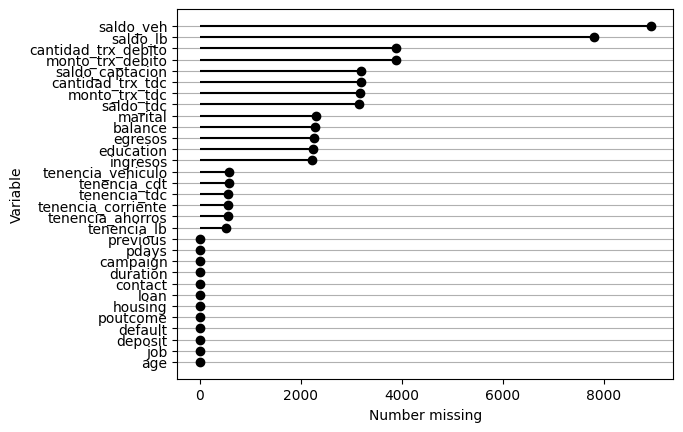

In [223]:
df.missing.missing_variable_plot()

### Busqueda de relaciones de valores faltantes
correlacion de nulidad

<Axes: >

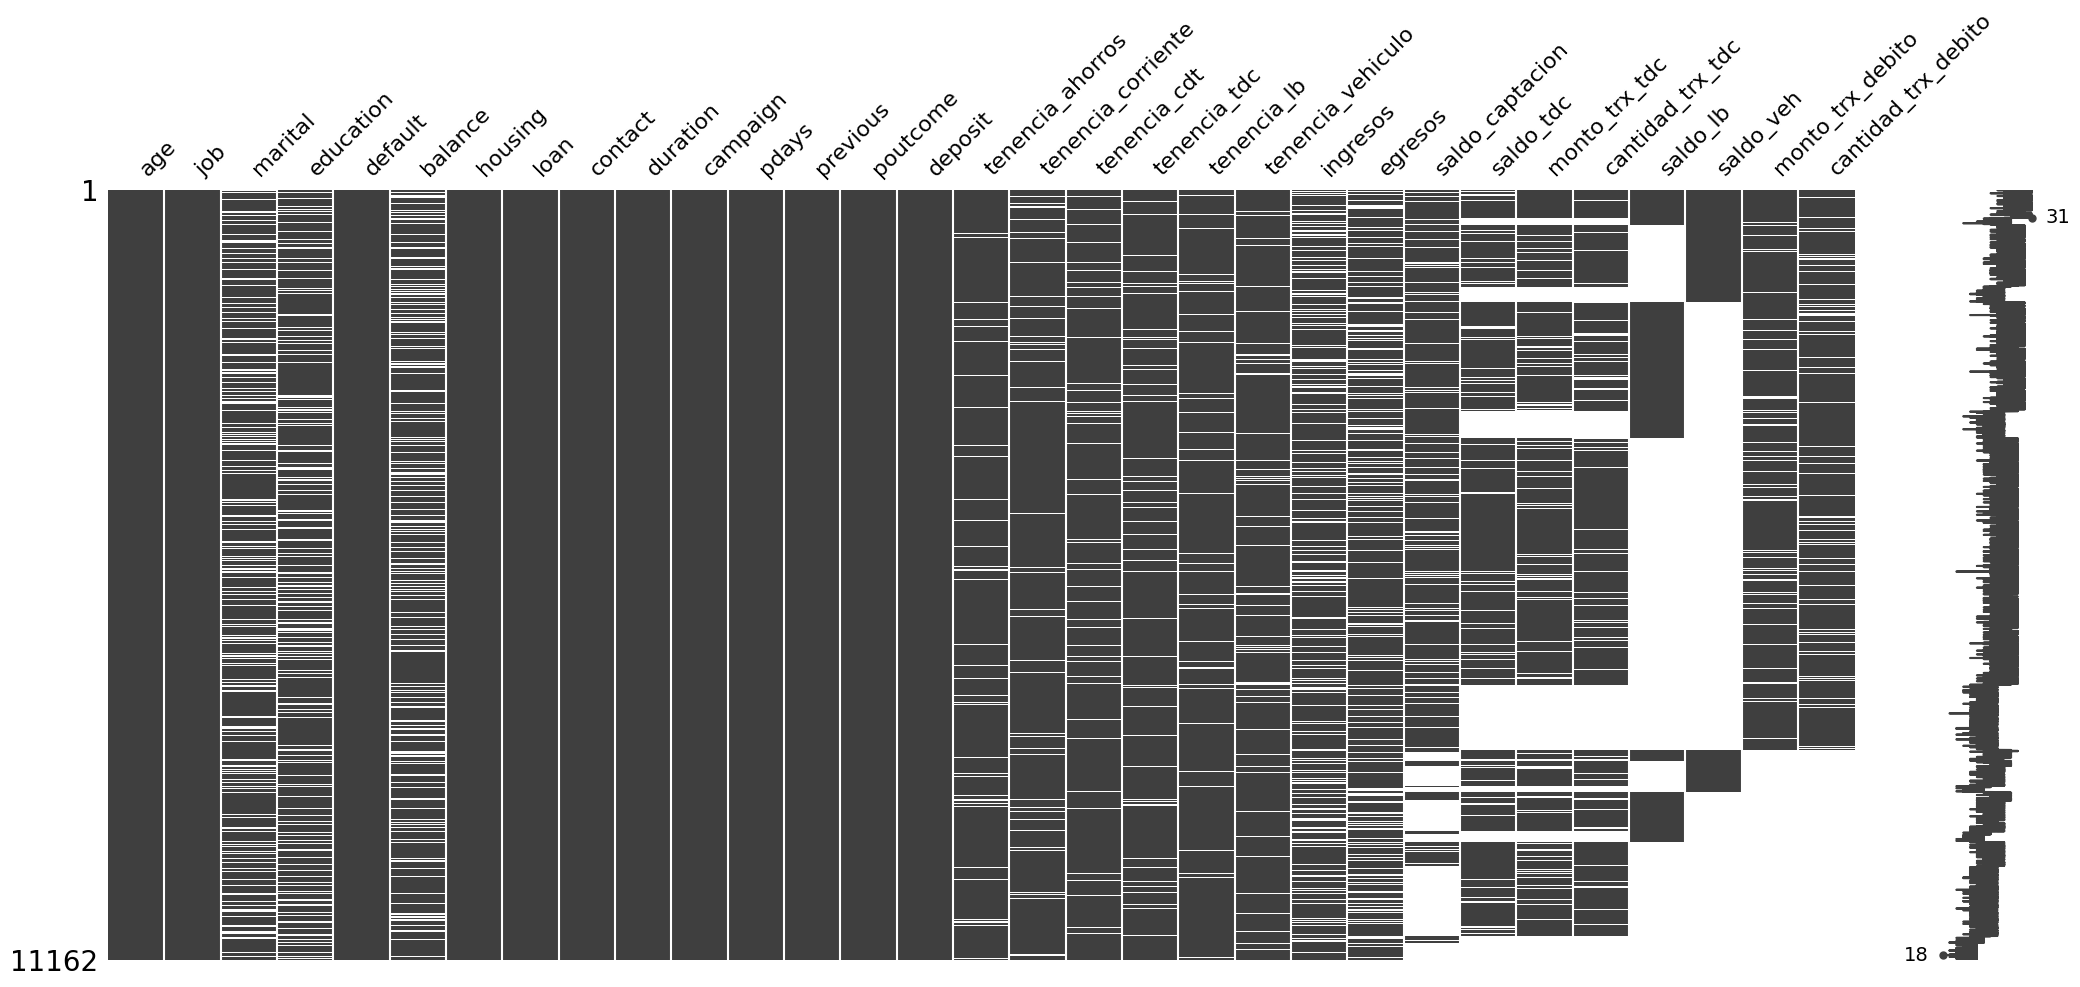

In [224]:
missingno.matrix(df=df)

<Axes: >

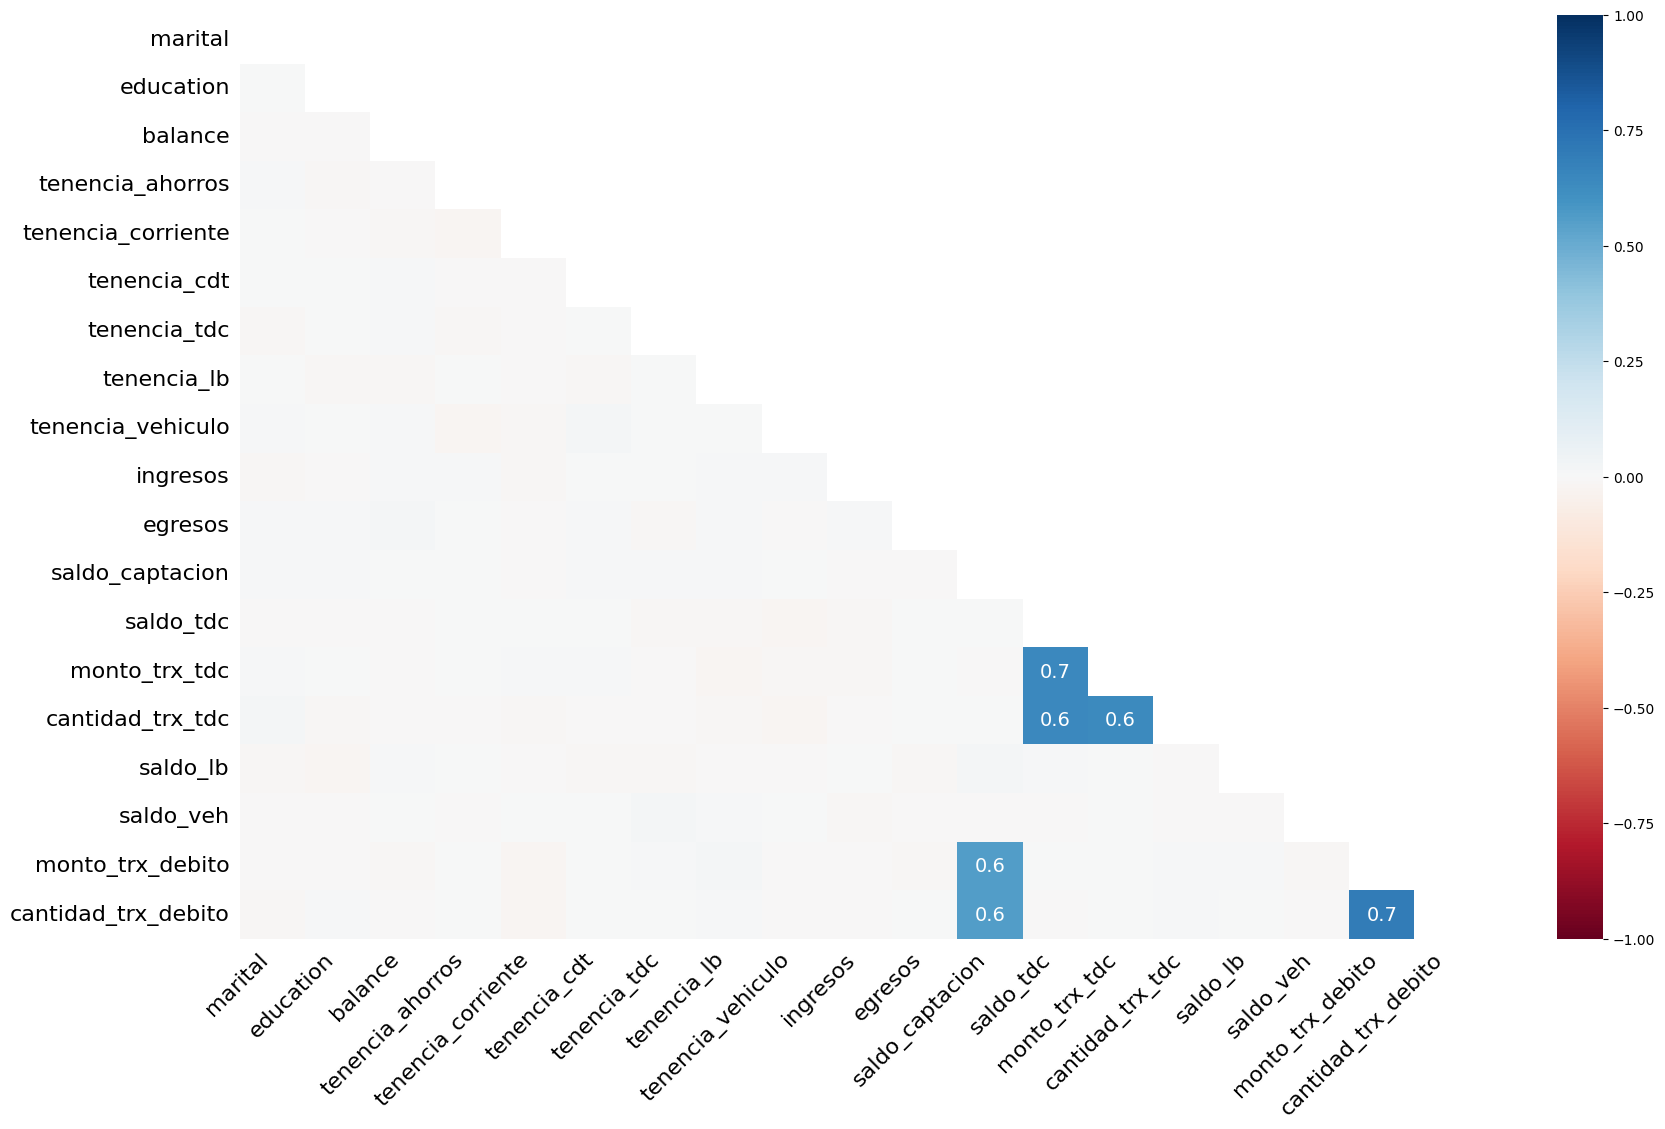

In [225]:
missingno.heatmap(
    df=df
)

<Axes: >

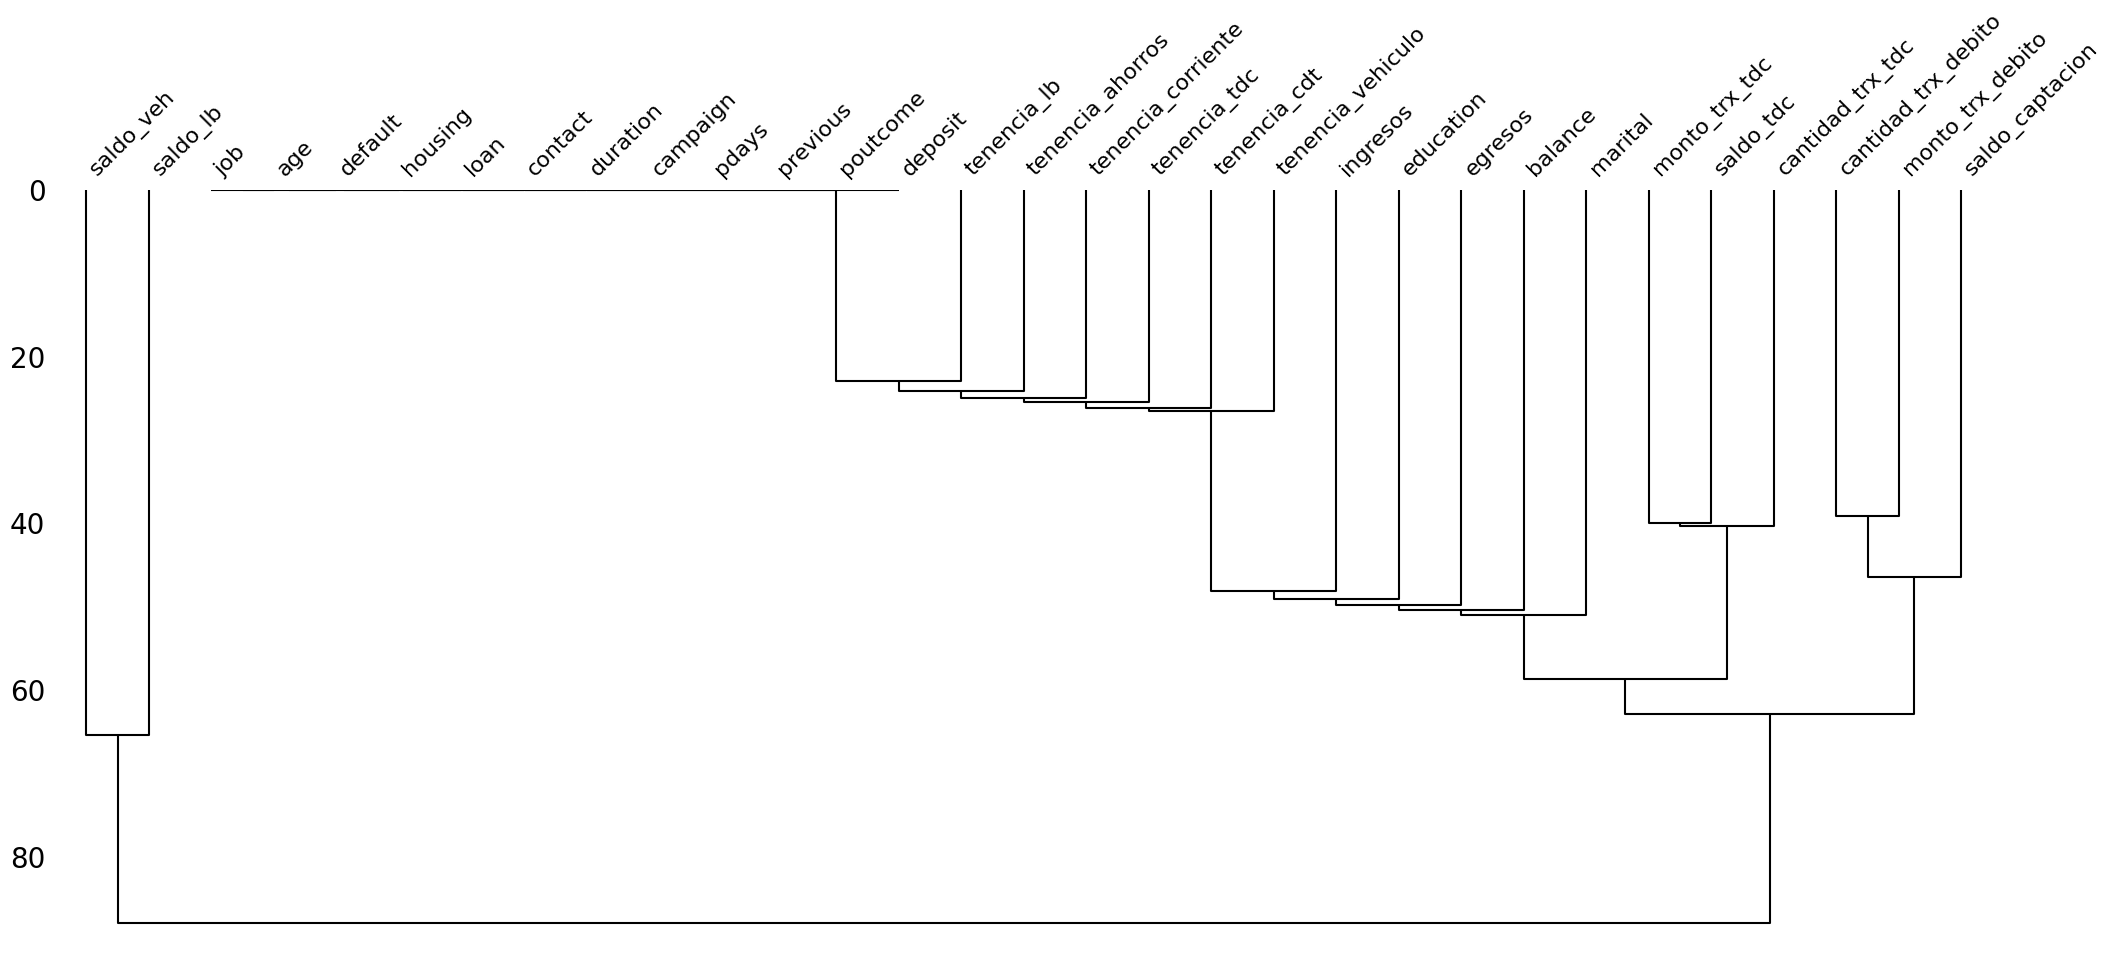

In [226]:
missingno.dendrogram(
    df=df
)

### Tratamiendo de valores faltantes

* La variable saldo_veh es la que tiene mayor cantidad de valores faltante, esto se debe a que las personas que no tienen crédito de vehiculo no deben de tener ningun saldo en este tipo de crédito. Así que reemplazaremos estos valores nulos por cero.

* La variable saldo_lib es la segunda variable con mayor cantidad de valores faltante, esto se debe a que las personas que no tienen crédito de libranza no deben de tener ningun saldo en este tipo de crédito. Así que reemplazaremos estos valores nulos por cero, cuando la variable tenencia_lb sea igual a cero.

<Axes: title={'center': 'cantidad_trx_debito'}>

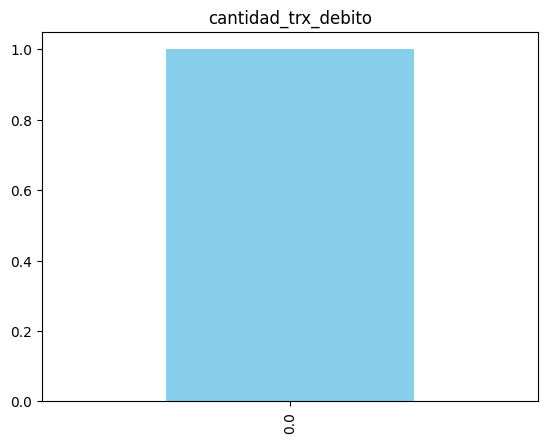

In [237]:
df_null_saldo_veh = df[df['saldo_veh'].isnull()]
df_null_saldo_veh['tenencia_vehiculo'].value_counts(normalize=True).plot(kind='bar',color="skyblue", title=var)

In [260]:
df_null_saldo_lib = df[df['saldo_captacion'].isnull()]
df_null_saldo_veh['tenencia_ahorros'].value_counts(normalize=True)#.plot(kind='bar',color="skyblue", title=var)

1.0    0.691796
0.0    0.308204
Name: tenencia_ahorros, dtype: float64

In [259]:
df_null_saldo_cap = df[df['saldo_captacion'].isnull()]
df_null_saldo_cap['tenencia_corriente'].value_counts(normalize=True)#.plot(kind='bar',color="skyblue", title=var)

0.0    0.966722
1.0    0.033278
Name: tenencia_corriente, dtype: float64

Reemplazando por cero los saldos vehiculares cuando el cliente no tiene credito de vehiculo

In [268]:
# Modificacion de valores nulos para saldo vehicular
df.loc[df['tenencia_vehiculo'] == 0, 'saldo_veh'] = df.loc[df['tenencia_vehiculo'] == 0, 'saldo_veh'].fillna(0)
df.loc[df['tenencia_lb'] == 0, 'saldo_lb'] = df.loc[df['tenencia_lb'] == 0, 'saldo_lb'].fillna(0)


Las personas que no tengan cuenta de ahorro, en los valores nulos de cantidad de transacciones debito y monto de transacciones debito se les pondra cero, ya que si un cliente no tiene cuenta debito no deberia tener saldo ni transacciones debito. Lo mismo pasaria con las personas que no tienen tarjeta de credito.

In [245]:
# MOdificacion de valores nulos para cantidad_trx_debito
df.loc[df['tenencia_ahorros'] == 0, 'cantidad_trx_debito'] = df.loc[df['tenencia_ahorros'] == 0, 'cantidad_trx_debito'].fillna(0)

df.loc[df['tenencia_ahorros'] == 0, 'monto_trx_debito'] = df.loc[df['tenencia_ahorros'] == 0, 'monto_trx_debito'].fillna(0)

In [249]:
# Modificacion de valores nulos para cantidad_trx_tdc

df.loc[df['tenencia_tdc'] == 0, 'cantidad_trx_tdc'] = df.loc[df['tenencia_tdc'] == 0, 'cantidad_trx_tdc'].fillna(0)

df.loc[df['tenencia_tdc'] == 0, 'monto_trx_tdc'] = df.loc[df['tenencia_tdc'] == 0, 'monto_trx_tdc'].fillna(0)

df.loc[df['tenencia_tdc'] == 0, 'saldo_tdc'] = df.loc[df['tenencia_tdc'] == 0, 'saldo_tdc'].fillna(0)

In [266]:
# Modificacion de valores nulos para saldo_captacion

df.loc[(df['tenencia_corriente'] == 0) & (df['tenencia_ahorros'] == 0), 'saldo_captacion'] = df.loc[(df['tenencia_corriente'] == 0) & (df['tenencia_ahorros'] == 0), 'saldo_captacion'].fillna(0)


Ahora para las variables nulas de tenencia del algun tipo de credito se hara un analisis inverso al anterior, es decir, si el cliente tiene algun saldo en el credito se le pondra uno, de lo contrario se le pondra cero.

In [ ]:
# Modificacion de valores para la tenencia de creditos
df.loc[df['saldo_veh'] != 0, 'tenencia_vehiculo'] = df.loc[df['saldo_veh'] != 0, 'tenencia_vehiculo'].fillna(1)
df.loc[df['saldo_lb'] != 0, 'tenencia_lb'] = df.loc[df['saldo_veh'] != 0, 'tenencia_lb'].fillna(1)

* Para saldo_captacion se le completa con regresion, ya que en este caso el cliente o tiene una cuenta de ahorros o una cuenta corriente
* Para los valores nulos de cantidad_trx_tdc, si el cliente tiene saldo en este variable se le pondra el promedio de la cantidad de transacciones con tarjeta de credito. El mismo proceso se hara para las cuentas debito
* Para los valores nulos en monto_trx_tdc, si el cliente tiene transacciones en esta variable se le pondra el promedio del monto, esto sin tener en cuenta las transacciones modificadas en el punto anterior. El mismo proceso se hara para las cuentas debito

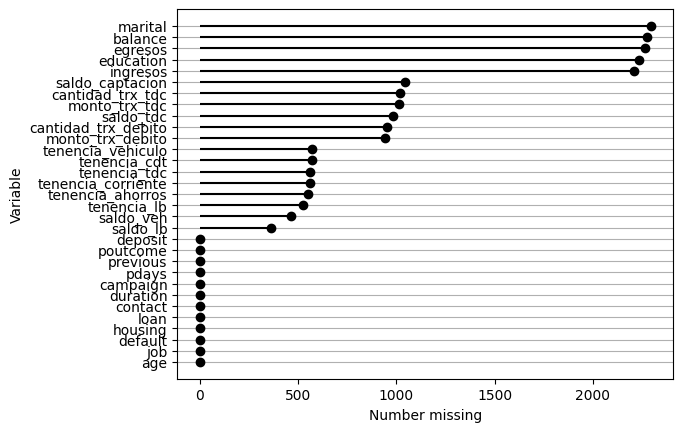

In [267]:
df.missing.missing_variable_plot()

* Los valores nulos de la variable marital y education para este caso se van a reemplazar por la moda
* Los valores nulos para las variables balance, ingresos y egresos se completaran teniendo en cuenta una regresion 


Las variables **saldo_veh** Saldo total en pesos en créditos de libranza y **saldo_lb**  Saldo total en pesos en créditos de vehículos tiene mas del 50% en valores faltantes, esto puede deberse a que esos clientes no tienen ese tipo de creditos.
* Las variables **cantidad_trx_debito** y **monto_trx_debito** tienen el 34\% de valores faltantes cada uno, estas variables pueden estar relacionadas debido a que ambas corresponden a clientes con cuentas debito.
* Las variables **cantidad_trx_tdc**, **monto_trx_tdc**, **saldo_tdc** tienen un \% similar de valores faltantes.


# Metricas de evaluación para problemas de clasificación

# Construcción del modelo